# Meadow Creek SWMM Model LID Scenario Automation 

# Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments
import os
import swmmio as sio

## Load in Input CSV

In [2]:
# Load in input data.

subbasin_attributes = pd.read_csv (r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\Target_MC_Subbasin_Data.csv')
subbasin_attributes = subbasin_attributes.set_index('Subbasin')


subbasin_attributes

,Areas,Perc_Imperv,...,Feasible_GrassSwale_Space,GrassSwale_Standard_Surface_Area
Subbasin,,,,,
72591,930398.04,24.798,...,2152.7800,7460.877
72631,952047.36,43.946,...,3229.1700,10546.630
72671,1011681.00,29.089,...,0.0000,8465.484
72731,954530.28,53.046,...,0.0000,9221.800
72781,1649965.68,32.151,...,0.0000,8414.588
72951,1785524.40,23.486,...,10763.9000,6868.850
73081,1531569.60,35.628,...,7534.7300,9263.514
73121,1481911.20,48.410,...,2152.7800,9874.122
73171,677488.68,57.681,...,0.0000,11048.030


# LID Scenario Generators

## Option 1: Manually Change in Block Below

In [3]:
#Manual changing may be easier to do in the csv file.  

## Option 2: Random or percent-wise implementation

In [4]:
subbasin_attributes["RainGarden_Assigned_Areas"]=""
subbasin_attributes["Bioretention_Assigned_Areas"]=""
subbasin_attributes["GreenRoof_Assigned_Areas"]=""
subbasin_attributes["PermeablePavement_Assigned_Areas"]=""
subbasin_attributes["GrassSwale_Assigned_Areas"]=""

perc_implementation = [0.9]

for subbasin in subbasin_attributes.index:
     subbasin_attributes['RainGarden_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_RainGarden_Space'][subbasin] * random.choice(perc_implementation)

for subbasin in subbasin_attributes.index:
     subbasin_attributes['Bioretention_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_Bioretention_Space'][subbasin] * random.choice(perc_implementation)
        
for subbasin in subbasin_attributes.index:
     subbasin_attributes['GreenRoof_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_GreenRoof_Space'][subbasin] * random.choice(perc_implementation)
                    
for subbasin in subbasin_attributes.index:
     subbasin_attributes['PermeablePavement_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_PermeablePavement_Space'][subbasin] * random.choice(perc_implementation)

for subbasin in subbasin_attributes.index:
     subbasin_attributes['GrassSwale_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_GrassSwale_Space'][subbasin] * random.choice(perc_implementation)


subbasin_attributes   

<ipython-input-4-7d954f69fe76>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subbasin_attributes['RainGarden_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_RainGarden_Space'][subbasin] * random.choice(perc_implementation)
<ipython-input-4-7d954f69fe76>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subbasin_attributes['Bioretention_Assigned_Areas'][subbasin] = subbasin_attributes['Feasible_Bioretention_Space'][subbasin] * random.choice(perc_implementation)
<ipython-input-4-7d954f69fe76>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,Areas,Perc_Imperv,...,PermeablePavement_Assigned_Areas,GrassSwale_Assigned_Areas
Subbasin,,,,,
72591,930398.04,24.798,...,0,1937.5
72631,952047.36,43.946,...,3232.85,2906.25
72671,1011681.00,29.089,...,0,0
72731,954530.28,53.046,...,8941.89,0
72781,1649965.68,32.151,...,11298.2,0
72951,1785524.40,23.486,...,12948.2,9687.51
73081,1531569.60,35.628,...,8718.76,6781.26
73121,1481911.20,48.410,...,11544.7,1937.5
73171,677488.68,57.681,...,8799.06,0


## Calculate total implemented LID areas for each subbasin

In [5]:
subbasin_attributes["Total_LID_Area"] = ""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Total_LID_Area'] = (subbasin_attributes.at[subbasin,'RainGarden_Assigned_Areas'] + 
                                                         subbasin_attributes.at[subbasin,'Bioretention_Assigned_Areas']+
                                                         subbasin_attributes.at[subbasin,'GreenRoof_Assigned_Areas'] +
                                                         subbasin_attributes.at[subbasin,'PermeablePavement_Assigned_Areas']+
                                                         subbasin_attributes.at[subbasin,'GrassSwale_Assigned_Areas'])

## Update impervious LID areas for each subbasin after LID implementation

In [6]:
subbasin_attributes['Updated_Imp_Areas']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Updated_Imp_Areas']=(subbasin_attributes.at[subbasin,'Imperv_Area'] -
                                                         subbasin_attributes.at[subbasin,'GreenRoof_Assigned_Areas']-
                                                         subbasin_attributes.at[subbasin,'PermeablePavement_Assigned_Areas'])
print(subbasin_attributes['Updated_Imp_Areas'])

Subbasin
72591    228783
72631    403525
72671    293232
72731    471242
72781    512401
72951    397681
73081    517703
73121    697427
73171    367323
73181    418090
73201    440127
73211    428959
73301    602102
73321    407528
73391    163099
73421    479052
73461    445383
73531    393014
73551    403931
73571    200574
Name: Updated_Imp_Areas, dtype: object


# Permeable Pavement LID Usage Editor Parameter Changes!
## Permeable Pavement Percent Impervious Treated Calculation for each Subbasin

In [7]:
subbasin_attributes['PermeablePavement_%ImpArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated'] = ((subbasin_attributes.at[subbasin,'PermeablePavement_Assigned_Areas']*2.5/
                                                                            subbasin_attributes.at[subbasin,'Updated_Imp_Areas'])*100)
    
subbasin_attributes.at[73461,'PermeablePavement_%ImpArea_Treated']    

13.05058639161233

# Percent Impervious area and Percent Pervious area treated changes according to total LID area implemented



# Following blocks calculate updated percent impervious area treated and percent impervious  changes for each subbasin based on LID scenario


## RainGarden LID Usage Editor Parameter Changes!

### Calculations for RainGarden Percent Impervious Area Treated for each Subbasin

In [8]:
subbasin_attributes['RainGarden_Total_Units']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_Total_Units'] = (subbasin_attributes.at[subbasin,'RainGarden_Assigned_Areas']/subbasin_attributes.at[subbasin,'RainGarden_Standard_Surface_Area'])
subbasin_attributes.at[73461,'RainGarden_Total_Units']    

4.573062526784872

In [9]:
subbasin_attributes['RainGarden_DrainageArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_DrainageArea_Treated']= subbasin_attributes.at[subbasin,'RainGarden_Total_Units']*21780
subbasin_attributes.at[73461,'RainGarden_DrainageArea_Treated']    

99601.30183337451

In [10]:
subbasin_attributes['RainGarden_ImpervArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_ImpervArea_Treated'] = subbasin_attributes.at[subbasin,'RainGarden_DrainageArea_Treated']* 0.25

In [11]:
subbasin_attributes['RainGarden_%ImpArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'RainGarden_ImpervArea_Treated']*100/subbasin_attributes.at[subbasin,'Updated_Imp_Areas'])

In [12]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] = 100
subbasin_attributes.at[72591,'RainGarden_%ImpArea_Treated']

100

### Calculations for RainGarden Percent Pervious Area Treated for each Subbasin

In [13]:
subbasin_attributes['RainGarden_PervArea_Treated'] =""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_PervArea_Treated'] = subbasin_attributes.at[subbasin,'RainGarden_DrainageArea_Treated'] * 0.75

In [14]:
subbasin_attributes['RainGarden_%PervArea_Treated']=""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated'] = 100*subbasin_attributes.at[subbasin,'RainGarden_PervArea_Treated']/subbasin_attributes.at[subbasin,'Perv_Area']  

In [15]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated'] = 100

## Bioretention LID Usage Editor Parameter Changes!

### Percent of Impervious Area Treated Calculations for each Subbasin

In [16]:
subbasin_attributes['Bioretention_Total_Units']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_Total_Units'] = (subbasin_attributes.at[subbasin,'Bioretention_Assigned_Areas']/subbasin_attributes.at[subbasin,'Bioretention_Standard_Surface_Area'])   

In [17]:
subbasin_attributes['Bioretention_DrainageArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_DrainageArea_Treated']= subbasin_attributes.at[subbasin,'Bioretention_Total_Units']*163350   

In [18]:
subbasin_attributes['Bioretention_ImpervArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_ImpervArea_Treated'] = subbasin_attributes.at[subbasin,'Bioretention_DrainageArea_Treated']* 0.5

In [19]:
subbasin_attributes['Bioretention_%ImpArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'Bioretention_ImpervArea_Treated']*100/subbasin_attributes.at[subbasin,'Updated_Imp_Areas'])

In [20]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] = 100

### Bioretention Percent Pervious Area Treated for each Subbasin

In [21]:
subbasin_attributes['Bioretention_PervArea_Treated'] =""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_PervArea_Treated'] = subbasin_attributes.at[subbasin,'Bioretention_DrainageArea_Treated'] * 0.5

In [22]:
subbasin_attributes['Bioretention_%PervArea_Treated']=""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated'] = 100*subbasin_attributes.at[subbasin,'Bioretention_PervArea_Treated']/subbasin_attributes.at[subbasin,'Perv_Area']
    
subbasin_attributes.at[73571,'Bioretention_%PervArea_Treated']    

47.21345301413609

In [23]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated'] = 100
subbasin_attributes.at[73571,'Bioretention_%PervArea_Treated']        

47.21345301413609

## Grass Swale LID Usage Editor Parameter Changes!

### Percent of Impervious Area Treated Calculations for each Subbasin

In [24]:
subbasin_attributes['GrassSwale_Total_Units']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_Total_Units'] = (subbasin_attributes.at[subbasin,'GrassSwale_Assigned_Areas']/subbasin_attributes.at[subbasin,'GrassSwale_Standard_Surface_Area'])   

In [25]:
subbasin_attributes['GrassSwale_DrainageArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_DrainageArea_Treated']= subbasin_attributes.at[subbasin,'GrassSwale_Total_Units']*163350   

In [26]:
subbasin_attributes['GrassSwale_ImpervArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_ImpervArea_Treated'] = subbasin_attributes.at[subbasin,'GrassSwale_DrainageArea_Treated']* 0.5

In [27]:
subbasin_attributes['GrassSwale_%ImpArea_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'GrassSwale_ImpervArea_Treated']*100/subbasin_attributes.at[subbasin,'Updated_Imp_Areas'])

In [28]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'] = 100

### Percent of pervious Area Treated Calculations for each Subbasin

In [29]:
subbasin_attributes['GrassSwale_PervArea_Treated'] =""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_PervArea_Treated'] = subbasin_attributes.at[subbasin,'GrassSwale_DrainageArea_Treated'] * 0.5

In [30]:
subbasin_attributes['GrassSwale_%PervArea_Treated']=""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'] = 100*subbasin_attributes.at[subbasin,'GrassSwale_PervArea_Treated']/subbasin_attributes.at[subbasin,'Perv_Area']   

In [31]:
for subbasin in subbasin_attributes.index:
    if subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'] > 100:
        subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'] = 100    

## Capping total %impervious and %pervious area treated at 100% for each subcatchment-LID combo. 

In [32]:
subbasin_attributes['%Imp_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'%Imp_Treated'] = (subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] + 
                                                      subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] +
                                                      subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated']+
                                                      subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'])

In [33]:
subbasin_attributes['%Perv_Treated']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'%Perv_Treated']= (subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated']+
                                                       subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated']+
                                                       subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'])
subbasin_attributes.at[73461,'%Perv_Treated']

42.612388201496564

In [34]:
# Pervious Surface Treated "Shaving"

for subbasin in subbasin_attributes.index:

    while subbasin_attributes.at[subbasin,'%Perv_Treated'] > 100:
        subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated']= subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated']-1
        subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated']=subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated']-0.25
        subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated']=subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated']-0.25
        
        if subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated'] = 0
        if subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated'] = 0
        if subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'] = 0
        
        subbasin_attributes.at[subbasin, '%Perv_Treated'] = (subbasin_attributes.at[subbasin,'RainGarden_%PervArea_Treated']+
                                                           subbasin_attributes.at[subbasin,'Bioretention_%PervArea_Treated']+
                                                           subbasin_attributes.at[subbasin,'GrassSwale_%PervArea_Treated'])

        
        
        
        
        
  #__________________________________________________________________________________________________________          





# Impervious Surface Treated "Shaving"

for subbasin in subbasin_attributes.index:
    
    while subbasin_attributes.at[subbasin,'%Imp_Treated'] > 100:
        subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated']=subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated']-1
        subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated']=subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated']-0.25
        subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated']=subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated']-0.25
        subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated']=subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated']-0.25        
        
        
        if subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated'] = 0
        if subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated'] = 0
        if subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated'] = 0
        if subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'] < 0:
            subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'] = 0
        
        
        
        
        subbasin_attributes.at[subbasin, '%Imp_Treated'] = (subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated']+
                                                           subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated']+
                                                           subbasin_attributes.at[subbasin,'PermeablePavement_%ImpArea_Treated']+
                                                           subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated'])
        


In [35]:
subbasin_attributes['Updated_%Imp']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Updated_%Imp'] = subbasin_attributes.at[subbasin,'Updated_Imp_Areas']*100 / subbasin_attributes.at[subbasin,'Areas']
    
subbasin_attributes.at[73461,'Updated_%Imp']

62.90114388664475

# Calculating Permeable Pavement & Green Roof Costs

In [36]:
#calculating costs for different LID scenarios

subbasin_attributes["PermeablePavement_Costs"]=""

#assuming pervious concrete, installation ONLY - O&M unclear/makes price too high

for subbasin in subbasin_attributes.index:
     subbasin_attributes.at[subbasin,'PermeablePavement_Costs'] = subbasin_attributes.at[subbasin,'PermeablePavement_Assigned_Areas'] * 9.79

        
subbasin_attributes["GreenRoof_Costs"]=""

for subbasin in subbasin_attributes.index:
     subbasin_attributes.at[subbasin,'GreenRoof_Costs'] = subbasin_attributes.at[subbasin,'GreenRoof_Assigned_Areas'] * 11.66        

# Calculating Rain Garden Costs

In [37]:
subbasin_attributes["Updated_RainGarden_ImpArea_Treated"] = ""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Updated_RainGarden_ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'RainGarden_%ImpArea_Treated']/100) * subbasin_attributes.at[subbasin,'Updated_Imp_Areas']
    
    
subbasin_attributes['Updated_RainGarden_ImpArea_Treated']    

Subbasin
72591     196753
72631     111407
72671     275638
72731     135035
72781     162248
72951     286358
73081    89106.5
73121     143482
73171          0
73181    16307.9
73201    48930.5
73211     104842
73301    3280.79
73321    2974.16
73391    55852.4
73421          0
73461    24900.3
73531      96567
73551    53295.7
73571    37924.2
Name: Updated_RainGarden_ImpArea_Treated, dtype: object

In [38]:
subbasin_attributes['RainGarden_Costs']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'RainGarden_Costs'] = subbasin_attributes.at[subbasin,'Updated_RainGarden_ImpArea_Treated'] * 2.34

subbasin_attributes.at[73461,'RainGarden_Costs']
    

58266.76157252408

# Calculating Bioretention Costs

In [39]:
subbasin_attributes["Updated_Bioretention_ImpArea_Treated"] = ""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Updated_Bioretention_ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'Bioretention_%ImpArea_Treated']/100) * subbasin_attributes.at[subbasin,'Updated_Imp_Areas']
    
    
subbasin_attributes['Updated_Bioretention_ImpArea_Treated']  

Subbasin
72591    16619.8
72631    17421.7
72671    17306.2
72731    59773.8
72781    162.225
72951    4678.63
73081          0
73121    93041.5
73171          0
73181          0
73201          0
73211          0
73301          0
73321          0
73391    19163.3
73421          0
73461          0
73531    14348.3
73551          0
73571    54587.8
Name: Updated_Bioretention_ImpArea_Treated, dtype: object

In [40]:
subbasin_attributes['Bioretention_Costs']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Bioretention_Costs'] = 2.34 * subbasin_attributes.at[subbasin,'Updated_Bioretention_ImpArea_Treated']    

# Calculating Grass Swale Costs

In [41]:
subbasin_attributes["Updated_GrassSwale_ImpArea_Treated"] = ""
for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'Updated_GrassSwale_ImpArea_Treated'] = (subbasin_attributes.at[subbasin,'GrassSwale_%ImpArea_Treated']/100) * subbasin_attributes.at[subbasin,'Updated_Imp_Areas']
    
    
subbasin_attributes['Updated_GrassSwale_ImpArea_Treated']  

Subbasin
72591    13202.6
72631    22506.5
72671          0
72731          0
72781          0
72951    93318.2
73081    59789.3
73121    16026.3
73171          0
73181          0
73201         -0
73211          0
73301          0
73321          0
73391    87318.9
73421          0
73461          0
73531          0
73551          0
73571    28266.8
Name: Updated_GrassSwale_ImpArea_Treated, dtype: object

In [42]:
subbasin_attributes['GrassSwale_Costs']=""

for subbasin in subbasin_attributes.index:
    subbasin_attributes.at[subbasin,'GrassSwale_Costs'] = 1.45 * subbasin_attributes.at[subbasin,'Updated_GrassSwale_ImpArea_Treated']

subbasin_attributes.at[73461,'GrassSwale_Costs']

0.0

# The following block updates the SWMM input file by adjusting the subcatchment percent impervious and widths using SWMMIO (parameters not adjustable using pyswmm alone)


In [43]:
#initialize a baseline model object in swmmio
baseline = sio.Model(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM')

#isolate subcatchments dataframe
subcatchments = baseline.inp.subcatchments

#Set subcatchment parameters

#Percent Impervious Adjustments

subcatchments.loc['73081','PercImperv'] = subbasin_attributes.at[73081,'Updated_%Imp']
subcatchments.loc['72671','PercImperv'] = subbasin_attributes.at[72671,'Updated_%Imp']
subcatchments.loc['72591','PercImperv'] = subbasin_attributes.at[72591,'Updated_%Imp']
subcatchments.loc['72631','PercImperv'] = subbasin_attributes.at[72631,'Updated_%Imp']
subcatchments.loc['72781','PercImperv'] = subbasin_attributes.at[72781,'Updated_%Imp']
subcatchments.loc['72731','PercImperv'] = subbasin_attributes.at[72731,'Updated_%Imp']
subcatchments.loc['72951','PercImperv'] = subbasin_attributes.at[72951,'Updated_%Imp']
subcatchments.loc['73211','PercImperv'] = subbasin_attributes.at[73211,'Updated_%Imp']
subcatchments.loc['73181','PercImperv'] = subbasin_attributes.at[73181,'Updated_%Imp']
subcatchments.loc['73171','PercImperv'] = subbasin_attributes.at[73171,'Updated_%Imp']
subcatchments.loc['73121','PercImperv'] = subbasin_attributes.at[73121,'Updated_%Imp']
subcatchments.loc['73201','PercImperv'] = subbasin_attributes.at[73201,'Updated_%Imp']
subcatchments.loc['73301','PercImperv'] = subbasin_attributes.at[73301,'Updated_%Imp']
subcatchments.loc['73321','PercImperv'] = subbasin_attributes.at[73321,'Updated_%Imp']
subcatchments.loc['73391','PercImperv'] = subbasin_attributes.at[73391,'Updated_%Imp']
subcatchments.loc['73461','PercImperv'] = subbasin_attributes.at[73461,'Updated_%Imp']
subcatchments.loc['73551','PercImperv'] = subbasin_attributes.at[73551,'Updated_%Imp']
subcatchments.loc['73421','PercImperv'] = subbasin_attributes.at[73421,'Updated_%Imp']
subcatchments.loc['73531','PercImperv'] = subbasin_attributes.at[73531,'Updated_%Imp']
subcatchments.loc['73571','PercImperv'] = subbasin_attributes.at[73571,'Updated_%Imp']

#Width Adjustment((SUBBASIN AREA/Flow Length) - LID Width)

subcatchments.loc['73081','Width'] = ((subcatchments.loc['73081','Area'] * 43560)/subbasin_attributes.at[73081,'FlowLengths']) - (subbasin_attributes.at[73081,'Total_LID_Area']/subbasin_attributes.at[73081,'FlowLengths'])
subcatchments.loc['72671','Width'] = ((subcatchments.loc['72671','Area'] * 43560)/subbasin_attributes.at[72671,'FlowLengths']) - (subbasin_attributes.at[72671,'Total_LID_Area']/subbasin_attributes.at[72671,'FlowLengths'])
subcatchments.loc['72591','Width'] = ((subcatchments.loc['72591','Area'] * 43560)/subbasin_attributes.at[72591,'FlowLengths']) - (subbasin_attributes.at[72591,'Total_LID_Area']/subbasin_attributes.at[72591,'FlowLengths'])
subcatchments.loc['72631','Width'] = ((subcatchments.loc['72631','Area'] * 43560)/subbasin_attributes.at[72631,'FlowLengths']) - (subbasin_attributes.at[72631,'Total_LID_Area']/subbasin_attributes.at[72631,'FlowLengths'])
subcatchments.loc['72781','Width'] = ((subcatchments.loc['72781','Area'] * 43560)/subbasin_attributes.at[72781,'FlowLengths']) - (subbasin_attributes.at[72781,'Total_LID_Area']/subbasin_attributes.at[72781,'FlowLengths'])
subcatchments.loc['72731','Width'] = ((subcatchments.loc['72731','Area'] * 43560)/subbasin_attributes.at[72731,'FlowLengths']) - (subbasin_attributes.at[72731,'Total_LID_Area']/subbasin_attributes.at[72731,'FlowLengths'])
subcatchments.loc['72951','Width'] = ((subcatchments.loc['72951','Area'] * 43560)/subbasin_attributes.at[72951,'FlowLengths']) - (subbasin_attributes.at[72951,'Total_LID_Area']/subbasin_attributes.at[72951,'FlowLengths'])
subcatchments.loc['73211','Width'] = ((subcatchments.loc['73211','Area'] * 43560)/subbasin_attributes.at[73211,'FlowLengths']) - (subbasin_attributes.at[73211,'Total_LID_Area']/subbasin_attributes.at[73211,'FlowLengths'])
subcatchments.loc['73181','Width'] = ((subcatchments.loc['73181','Area'] * 43560)/subbasin_attributes.at[73181,'FlowLengths']) - (subbasin_attributes.at[73181,'Total_LID_Area']/subbasin_attributes.at[73181,'FlowLengths'])
subcatchments.loc['73171','Width'] = ((subcatchments.loc['73171','Area'] * 43560)/subbasin_attributes.at[73171,'FlowLengths']) - (subbasin_attributes.at[73171,'Total_LID_Area']/subbasin_attributes.at[73171,'FlowLengths'])
subcatchments.loc['73121','Width'] = ((subcatchments.loc['73121','Area'] * 43560)/subbasin_attributes.at[73121,'FlowLengths']) - (subbasin_attributes.at[73121,'Total_LID_Area']/subbasin_attributes.at[73121,'FlowLengths'])
subcatchments.loc['73201','Width'] = ((subcatchments.loc['73201','Area'] * 43560)/subbasin_attributes.at[73201,'FlowLengths']) - (subbasin_attributes.at[73201,'Total_LID_Area']/subbasin_attributes.at[73201,'FlowLengths'])
subcatchments.loc['73301','Width'] = ((subcatchments.loc['73301','Area'] * 43560)/subbasin_attributes.at[73301,'FlowLengths']) - (subbasin_attributes.at[73301,'Total_LID_Area']/subbasin_attributes.at[73301,'FlowLengths'])
subcatchments.loc['73321','Width'] = ((subcatchments.loc['73321','Area'] * 43560)/subbasin_attributes.at[73321,'FlowLengths']) - (subbasin_attributes.at[73321,'Total_LID_Area']/subbasin_attributes.at[73321,'FlowLengths'])
subcatchments.loc['73391','Width'] = ((subcatchments.loc['73391','Area'] * 43560)/subbasin_attributes.at[73391,'FlowLengths']) - (subbasin_attributes.at[73391,'Total_LID_Area']/subbasin_attributes.at[73391,'FlowLengths'])
subcatchments.loc['73461','Width'] = ((subcatchments.loc['73461','Area'] * 43560)/subbasin_attributes.at[73461,'FlowLengths']) - (subbasin_attributes.at[73461,'Total_LID_Area']/subbasin_attributes.at[73461,'FlowLengths'])
subcatchments.loc['73551','Width'] = ((subcatchments.loc['73551','Area'] * 43560)/subbasin_attributes.at[73551,'FlowLengths']) - (subbasin_attributes.at[73551,'Total_LID_Area']/subbasin_attributes.at[73551,'FlowLengths'])
subcatchments.loc['73421','Width'] = ((subcatchments.loc['73421','Area'] * 43560)/subbasin_attributes.at[73421,'FlowLengths']) - (subbasin_attributes.at[73421,'Total_LID_Area']/subbasin_attributes.at[73421,'FlowLengths'])
subcatchments.loc['73531','Width'] = ((subcatchments.loc['73531','Area'] * 43560)/subbasin_attributes.at[73531,'FlowLengths']) - (subbasin_attributes.at[73531,'Total_LID_Area']/subbasin_attributes.at[73531,'FlowLengths'])
subcatchments.loc['73571','Width'] = ((subcatchments.loc['73571','Area'] * 43560)/subbasin_attributes.at[73571,'FlowLengths']) - (subbasin_attributes.at[73571,'Total_LID_Area']/subbasin_attributes.at[73571,'FlowLengths'])

#save subcatchment dataframe changes to whole inp dataframe
baseline.inp.subcatchments = subcatchments

#create the new inp file to use. 
newfilepath = os.path.join(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS", baseline.inp.name + "_" + 'Adjusted_SB_Parameters' + '.inp')
    
#Write the subcatchment section of the new model with the adjusted data

baseline.inp.save(newfilepath)

# 

# PYSWMM simulation with LID adjustments

In [44]:
with Simulation(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.inp", reportfile = r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt') as sim:
    
    
    control_time_step = 86400*3
    sim.step_advance(control_time_step)
    
    
    #Load in subcatchment lid list
    
    lid_sub_73081 = LidGroups(sim)['73081']
    lid_sub_72671 = LidGroups(sim)['72671']
    lid_sub_72591 = LidGroups(sim)['72591']
    lid_sub_72631 = LidGroups(sim)['72631']
    lid_sub_72781 = LidGroups(sim)['72781']
    lid_sub_72731 = LidGroups(sim)['72731']
    lid_sub_72951 = LidGroups(sim)['72951']
    lid_sub_73211 = LidGroups(sim)['73211']
    lid_sub_73181 = LidGroups(sim)['73181']
    lid_sub_73171 = LidGroups(sim)['73171']
    lid_sub_73121 = LidGroups(sim)['73121']
    lid_sub_73201 = LidGroups(sim)['73201']
    lid_sub_73301 = LidGroups(sim)['73301']
    lid_sub_73321 = LidGroups(sim)['73321']
    lid_sub_73391 = LidGroups(sim)['73391']
    lid_sub_73461 = LidGroups(sim)['73461']
    lid_sub_73551 = LidGroups(sim)['73551']
    lid_sub_73421 = LidGroups(sim)['73421']
    lid_sub_73531 = LidGroups(sim)['73531']
    lid_sub_73571 = LidGroups(sim)['73571']
    
    
#     #Set LID Areas!

    
    lid_sub_73081[0].unit_area = subbasin_attributes.at[73081,'GreenRoof_Assigned_Areas']
    lid_sub_73081[1].unit_area = subbasin_attributes.at[73081,'PermeablePavement_Assigned_Areas']
    lid_sub_73081[2].unit_area = subbasin_attributes.at[73081,'RainGarden_Assigned_Areas']
    lid_sub_73081[3].unit_area = subbasin_attributes.at[73081,'Bioretention_Assigned_Areas']
    lid_sub_73081[4].unit_area = subbasin_attributes.at[73081,'GrassSwale_Assigned_Areas']
    
    lid_sub_72671[0].unit_area = subbasin_attributes.at[72671,'GreenRoof_Assigned_Areas']
    lid_sub_72671[1].unit_area = subbasin_attributes.at[72671,'PermeablePavement_Assigned_Areas']
    lid_sub_72671[2].unit_area = subbasin_attributes.at[72671,'RainGarden_Assigned_Areas']
    lid_sub_72671[3].unit_area = subbasin_attributes.at[72671,'Bioretention_Assigned_Areas']
    lid_sub_72671[4].unit_area = subbasin_attributes.at[72671,'GrassSwale_Assigned_Areas']
    
    lid_sub_72591[0].unit_area = subbasin_attributes.at[72591,'GreenRoof_Assigned_Areas']
    lid_sub_72591[1].unit_area = subbasin_attributes.at[72591,'PermeablePavement_Assigned_Areas']
    lid_sub_72591[2].unit_area = subbasin_attributes.at[72591,'RainGarden_Assigned_Areas']
    lid_sub_72591[3].unit_area = subbasin_attributes.at[72591,'Bioretention_Assigned_Areas']
    lid_sub_72591[4].unit_area = subbasin_attributes.at[72591,'GrassSwale_Assigned_Areas']
    
    lid_sub_72631[0].unit_area = subbasin_attributes.at[72631,'GreenRoof_Assigned_Areas']
    lid_sub_72631[1].unit_area = subbasin_attributes.at[72631,'PermeablePavement_Assigned_Areas']
    lid_sub_72631[2].unit_area = subbasin_attributes.at[72631,'RainGarden_Assigned_Areas']
    lid_sub_72631[3].unit_area = subbasin_attributes.at[72631,'Bioretention_Assigned_Areas']
    lid_sub_72631[4].unit_area = subbasin_attributes.at[72631,'GrassSwale_Assigned_Areas']
    
    lid_sub_72781[0].unit_area = subbasin_attributes.at[72781,'GreenRoof_Assigned_Areas']
    lid_sub_72781[1].unit_area = subbasin_attributes.at[72781,'PermeablePavement_Assigned_Areas']
    lid_sub_72781[2].unit_area = subbasin_attributes.at[72781,'RainGarden_Assigned_Areas']
    lid_sub_72781[3].unit_area = subbasin_attributes.at[72781,'Bioretention_Assigned_Areas']
    lid_sub_72781[4].unit_area = subbasin_attributes.at[72781,'GrassSwale_Assigned_Areas']
    
    lid_sub_72731[0].unit_area = subbasin_attributes.at[72731,'GreenRoof_Assigned_Areas']
    lid_sub_72731[1].unit_area = subbasin_attributes.at[72731,'PermeablePavement_Assigned_Areas']
    lid_sub_72731[2].unit_area = subbasin_attributes.at[72731,'RainGarden_Assigned_Areas']
    lid_sub_72731[3].unit_area = subbasin_attributes.at[72731,'Bioretention_Assigned_Areas']
    lid_sub_72731[4].unit_area = subbasin_attributes.at[72731,'GrassSwale_Assigned_Areas']
    
    lid_sub_72951[0].unit_area = subbasin_attributes.at[72951,'GreenRoof_Assigned_Areas']
    lid_sub_72951[1].unit_area = subbasin_attributes.at[72951,'PermeablePavement_Assigned_Areas']
    lid_sub_72951[2].unit_area = subbasin_attributes.at[72951,'RainGarden_Assigned_Areas']
    lid_sub_72951[3].unit_area = subbasin_attributes.at[72951,'PermeablePavement_Assigned_Areas']
    lid_sub_72951[4].unit_area = subbasin_attributes.at[72951,'GrassSwale_Assigned_Areas']
    
    lid_sub_73211[0].unit_area = subbasin_attributes.at[73211,'GreenRoof_Assigned_Areas']
    lid_sub_73211[1].unit_area = subbasin_attributes.at[73211,'PermeablePavement_Assigned_Areas']
    lid_sub_73211[2].unit_area = subbasin_attributes.at[73211,'RainGarden_Assigned_Areas']
    lid_sub_73211[3].unit_area = subbasin_attributes.at[73211,'Bioretention_Assigned_Areas']
    lid_sub_73211[4].unit_area = subbasin_attributes.at[73211,'GrassSwale_Assigned_Areas']
    
    lid_sub_73181[0].unit_area = subbasin_attributes.at[73181,'GreenRoof_Assigned_Areas']
    lid_sub_73181[1].unit_area = subbasin_attributes.at[73181,'PermeablePavement_Assigned_Areas']
    lid_sub_73181[2].unit_area = subbasin_attributes.at[73181,'RainGarden_Assigned_Areas']
    lid_sub_73181[3].unit_area = subbasin_attributes.at[73181,'Bioretention_Assigned_Areas']
    lid_sub_73181[4].unit_area = subbasin_attributes.at[73181,'GrassSwale_Assigned_Areas']
    
    lid_sub_73171[0].unit_area = subbasin_attributes.at[73171,'GreenRoof_Assigned_Areas']
    lid_sub_73171[1].unit_area = subbasin_attributes.at[73171,'PermeablePavement_Assigned_Areas']
    lid_sub_73171[2].unit_area = subbasin_attributes.at[73171,'RainGarden_Assigned_Areas']
    lid_sub_73171[3].unit_area = subbasin_attributes.at[73171,'Bioretention_Assigned_Areas']
    lid_sub_73171[4].unit_area = subbasin_attributes.at[73171,'GrassSwale_Assigned_Areas']
    
    lid_sub_73121[0].unit_area = subbasin_attributes.at[73121,'GreenRoof_Assigned_Areas']
    lid_sub_73121[1].unit_area = subbasin_attributes.at[73121,'PermeablePavement_Assigned_Areas']
    lid_sub_73121[2].unit_area = subbasin_attributes.at[73121,'RainGarden_Assigned_Areas']
    lid_sub_73121[3].unit_area = subbasin_attributes.at[73121,'Bioretention_Assigned_Areas']
    lid_sub_73121[4].unit_area = subbasin_attributes.at[73121,'GrassSwale_Assigned_Areas']
    
    lid_sub_73201[0].unit_area = subbasin_attributes.at[73201,'GreenRoof_Assigned_Areas']
    lid_sub_73201[1].unit_area = subbasin_attributes.at[73201,'PermeablePavement_Assigned_Areas']
    lid_sub_73201[2].unit_area = subbasin_attributes.at[73201,'RainGarden_Assigned_Areas']
    lid_sub_73201[3].unit_area = subbasin_attributes.at[73201,'Bioretention_Assigned_Areas']
    lid_sub_73201[4].unit_area = subbasin_attributes.at[73201,'GrassSwale_Assigned_Areas']
    
    lid_sub_73301[0].unit_area = subbasin_attributes.at[73301,'GreenRoof_Assigned_Areas']
    lid_sub_73301[1].unit_area = subbasin_attributes.at[73301,'PermeablePavement_Assigned_Areas']
    lid_sub_73301[2].unit_area = subbasin_attributes.at[73301,'RainGarden_Assigned_Areas']
    lid_sub_73301[3].unit_area = subbasin_attributes.at[73301,'Bioretention_Assigned_Areas']
    lid_sub_73301[4].unit_area = subbasin_attributes.at[73301,'GrassSwale_Assigned_Areas']
    
    lid_sub_73321[0].unit_area = subbasin_attributes.at[73321,'GreenRoof_Assigned_Areas']
    lid_sub_73321[1].unit_area = subbasin_attributes.at[73321,'PermeablePavement_Assigned_Areas']
    lid_sub_73321[2].unit_area = subbasin_attributes.at[73321,'RainGarden_Assigned_Areas']
    lid_sub_73321[3].unit_area = subbasin_attributes.at[73321,'Bioretention_Assigned_Areas']
    lid_sub_73321[4].unit_area = subbasin_attributes.at[73321,'GrassSwale_Assigned_Areas']
    
    lid_sub_73391[0].unit_area = subbasin_attributes.at[73391,'GreenRoof_Assigned_Areas']
    lid_sub_73391[1].unit_area = subbasin_attributes.at[73391,'PermeablePavement_Assigned_Areas']
    lid_sub_73391[2].unit_area = subbasin_attributes.at[73391,'RainGarden_Assigned_Areas']
    lid_sub_73391[3].unit_area = subbasin_attributes.at[73391,'Bioretention_Assigned_Areas']
    lid_sub_73391[4].unit_area = subbasin_attributes.at[73391,'GrassSwale_Assigned_Areas']
    
    lid_sub_73461[0].unit_area = subbasin_attributes.at[73461,'GreenRoof_Assigned_Areas']
    lid_sub_73461[1].unit_area = subbasin_attributes.at[73461,'PermeablePavement_Assigned_Areas']
    lid_sub_73461[2].unit_area = subbasin_attributes.at[73461,'RainGarden_Assigned_Areas']
    lid_sub_73461[3].unit_area = subbasin_attributes.at[73461,'Bioretention_Assigned_Areas']
    lid_sub_73461[4].unit_area = subbasin_attributes.at[73461,'GrassSwale_Assigned_Areas']
    
    lid_sub_73551[0].unit_area = subbasin_attributes.at[73551,'GreenRoof_Assigned_Areas']
    lid_sub_73551[1].unit_area = subbasin_attributes.at[73551,'PermeablePavement_Assigned_Areas']
    lid_sub_73551[2].unit_area = subbasin_attributes.at[73551,'RainGarden_Assigned_Areas']
    lid_sub_73551[3].unit_area = subbasin_attributes.at[73551,'Bioretention_Assigned_Areas']
    lid_sub_73551[4].unit_area = subbasin_attributes.at[73551,'GrassSwale_Assigned_Areas']
    
    lid_sub_73421[0].unit_area = subbasin_attributes.at[73421,'GreenRoof_Assigned_Areas']
    lid_sub_73421[1].unit_area = subbasin_attributes.at[73421,'PermeablePavement_Assigned_Areas']
    lid_sub_73421[2].unit_area = subbasin_attributes.at[73421,'RainGarden_Assigned_Areas']
    lid_sub_73421[3].unit_area = subbasin_attributes.at[73421,'Bioretention_Assigned_Areas']
    lid_sub_73421[4].unit_area = subbasin_attributes.at[73421,'GrassSwale_Assigned_Areas']
    
    lid_sub_73531[0].unit_area = subbasin_attributes.at[73531,'GreenRoof_Assigned_Areas']
    lid_sub_73531[1].unit_area = subbasin_attributes.at[73531,'PermeablePavement_Assigned_Areas']
    lid_sub_73531[2].unit_area = subbasin_attributes.at[73531,'RainGarden_Assigned_Areas']
    lid_sub_73531[3].unit_area = subbasin_attributes.at[73531,'Bioretention_Assigned_Areas']
    lid_sub_73531[4].unit_area = subbasin_attributes.at[73531,'GrassSwale_Assigned_Areas']
    
    lid_sub_73571[0].unit_area = subbasin_attributes.at[73571,'GreenRoof_Assigned_Areas']
    lid_sub_73571[1].unit_area = subbasin_attributes.at[73571,'PermeablePavement_Assigned_Areas']
    lid_sub_73571[2].unit_area = subbasin_attributes.at[73571,'RainGarden_Assigned_Areas']
    lid_sub_73571[3].unit_area = subbasin_attributes.at[73571,'Bioretention_Assigned_Areas']
    lid_sub_73571[4].unit_area = subbasin_attributes.at[73571,'GrassSwale_Assigned_Areas']
    
    
    
#Set Percent Impervious Areas Treated


    lid_sub_73081[1].from_impervious = subbasin_attributes.at[73081,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73081[2].from_impervious = subbasin_attributes.at[73081,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73081[3].from_impervious = subbasin_attributes.at[73081,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73081[4].from_impervious = subbasin_attributes.at[73081,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72671[1].from_impervious = subbasin_attributes.at[72671,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72671[2].from_impervious = subbasin_attributes.at[72671,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72671[3].from_impervious = subbasin_attributes.at[72671,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72671[4].from_impervious = subbasin_attributes.at[72671,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72591[1].from_impervious = subbasin_attributes.at[72591,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72591[2].from_impervious = subbasin_attributes.at[72591,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72591[3].from_impervious = subbasin_attributes.at[72591,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72591[4].from_impervious = subbasin_attributes.at[72591,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72631[1].from_impervious = subbasin_attributes.at[72631,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72631[2].from_impervious = subbasin_attributes.at[72631,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72631[3].from_impervious = subbasin_attributes.at[72631,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72631[4].from_impervious = subbasin_attributes.at[72631,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72781[1].from_impervious = subbasin_attributes.at[72781,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72781[2].from_impervious = subbasin_attributes.at[72781,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72781[3].from_impervious = subbasin_attributes.at[72781,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72781[4].from_impervious = subbasin_attributes.at[72781,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72731[1].from_impervious = subbasin_attributes.at[72731,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72731[2].from_impervious = subbasin_attributes.at[72731,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72731[3].from_impervious = subbasin_attributes.at[72731,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72731[4].from_impervious = subbasin_attributes.at[72731,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_72951[1].from_impervious = subbasin_attributes.at[72951,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_72951[2].from_impervious = subbasin_attributes.at[72951,'RainGarden_%ImpArea_Treated'] 
    lid_sub_72951[3].from_impervious = subbasin_attributes.at[72951,'Bioretention_%ImpArea_Treated'] 
    lid_sub_72951[4].from_impervious = subbasin_attributes.at[72951,'GrassSwale_%ImpArea_Treated'] 
    
    
    lid_sub_73211[1].from_impervious = subbasin_attributes.at[73211,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73211[2].from_impervious = subbasin_attributes.at[73211,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73211[3].from_impervious = subbasin_attributes.at[73211,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73211[4].from_impervious = subbasin_attributes.at[73211,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73181[1].from_impervious = subbasin_attributes.at[73181,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73181[2].from_impervious = subbasin_attributes.at[73181,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73181[3].from_impervious = subbasin_attributes.at[73181,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73181[4].from_impervious = subbasin_attributes.at[73181,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73171[1].from_impervious = subbasin_attributes.at[73181,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73171[2].from_impervious = subbasin_attributes.at[73181,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73171[3].from_impervious = subbasin_attributes.at[73181,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73171[4].from_impervious = subbasin_attributes.at[73181,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73121[1].from_impervious = subbasin_attributes.at[73121,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73121[2].from_impervious = subbasin_attributes.at[73121,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73121[3].from_impervious = subbasin_attributes.at[73121,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73121[4].from_impervious = subbasin_attributes.at[73121,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73201[1].from_impervious = subbasin_attributes.at[73201,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73201[2].from_impervious = subbasin_attributes.at[73201,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73201[3].from_impervious = subbasin_attributes.at[73201,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73201[4].from_impervious = subbasin_attributes.at[73201,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73301[1].from_impervious = subbasin_attributes.at[73301,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73301[2].from_impervious = subbasin_attributes.at[73301,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73301[3].from_impervious = subbasin_attributes.at[73301,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73301[4].from_impervious = subbasin_attributes.at[73301,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73321[1].from_impervious = subbasin_attributes.at[73321,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73321[2].from_impervious = subbasin_attributes.at[73321,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73321[3].from_impervious = subbasin_attributes.at[73321,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73321[4].from_impervious = subbasin_attributes.at[73321,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73391[1].from_impervious = subbasin_attributes.at[73391,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73391[2].from_impervious = subbasin_attributes.at[73391,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73391[3].from_impervious = subbasin_attributes.at[73391,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73391[4].from_impervious = subbasin_attributes.at[73391,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73461[1].from_impervious = subbasin_attributes.at[73461,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73461[2].from_impervious = subbasin_attributes.at[73461,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73461[3].from_impervious = subbasin_attributes.at[73461,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73461[4].from_impervious = subbasin_attributes.at[73461,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73551[1].from_impervious = subbasin_attributes.at[73551,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73551[2].from_impervious = subbasin_attributes.at[73551,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73551[3].from_impervious = subbasin_attributes.at[73551,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73551[4].from_impervious = subbasin_attributes.at[73551,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73421[1].from_impervious = subbasin_attributes.at[73421,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73421[2].from_impervious = subbasin_attributes.at[73421,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73421[3].from_impervious = subbasin_attributes.at[73421,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73421[4].from_impervious = subbasin_attributes.at[73421,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73531[1].from_impervious = subbasin_attributes.at[73531,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73531[2].from_impervious = subbasin_attributes.at[73531,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73531[3].from_impervious = subbasin_attributes.at[73531,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73531[4].from_impervious = subbasin_attributes.at[73531,'GrassSwale_%ImpArea_Treated'] 
    
    lid_sub_73571[1].from_impervious = subbasin_attributes.at[73571,'PermeablePavement_%ImpArea_Treated'] 
    lid_sub_73571[2].from_impervious = subbasin_attributes.at[73571,'RainGarden_%ImpArea_Treated'] 
    lid_sub_73571[3].from_impervious = subbasin_attributes.at[73571,'Bioretention_%ImpArea_Treated'] 
    lid_sub_73571[4].from_impervious = subbasin_attributes.at[73571,'GrassSwale_%ImpArea_Treated'] 

# Set % Pervious Areas Treated
    
    lid_sub_73081[2].from_pervious = subbasin_attributes.at[73081,'RainGarden_%PervArea_Treated']  
    lid_sub_73081[3].from_pervious = subbasin_attributes.at[73081,'Bioretention_%PervArea_Treated']  
    lid_sub_73081[4].from_pervious = subbasin_attributes.at[73081,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72671[2].from_pervious = subbasin_attributes.at[72671,'RainGarden_%PervArea_Treated']  
    lid_sub_72671[3].from_pervious = subbasin_attributes.at[72671,'Bioretention_%PervArea_Treated']  
    lid_sub_72671[4].from_pervious = subbasin_attributes.at[72671,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72591[2].from_pervious = subbasin_attributes.at[72591,'RainGarden_%PervArea_Treated']  
    lid_sub_72591[3].from_pervious = subbasin_attributes.at[72591,'Bioretention_%PervArea_Treated']  
    lid_sub_72591[4].from_pervious = subbasin_attributes.at[72591,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72631[2].from_pervious = subbasin_attributes.at[72631,'RainGarden_%PervArea_Treated']  
    lid_sub_72631[3].from_pervious = subbasin_attributes.at[72631,'Bioretention_%PervArea_Treated']  
    lid_sub_72631[4].from_pervious = subbasin_attributes.at[72631,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72781[2].from_pervious = subbasin_attributes.at[72781,'RainGarden_%PervArea_Treated']  
    lid_sub_72781[3].from_pervious = subbasin_attributes.at[72781,'Bioretention_%PervArea_Treated']  
    lid_sub_72781[4].from_pervious = subbasin_attributes.at[72781,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72731[2].from_pervious = subbasin_attributes.at[72731,'RainGarden_%PervArea_Treated']  
    lid_sub_72731[3].from_pervious = subbasin_attributes.at[72731,'Bioretention_%PervArea_Treated']  
    lid_sub_72731[4].from_pervious = subbasin_attributes.at[72731,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_72951[2].from_pervious = subbasin_attributes.at[72951,'RainGarden_%PervArea_Treated']  
    lid_sub_72951[3].from_pervious = subbasin_attributes.at[72951,'Bioretention_%PervArea_Treated']  
    lid_sub_72951[4].from_pervious = subbasin_attributes.at[72951,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73211[2].from_pervious = subbasin_attributes.at[73211,'RainGarden_%PervArea_Treated']  
    lid_sub_73211[3].from_pervious = subbasin_attributes.at[73211,'Bioretention_%PervArea_Treated']  
    lid_sub_73211[4].from_pervious = subbasin_attributes.at[73211,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73181[2].from_pervious = subbasin_attributes.at[73181,'RainGarden_%PervArea_Treated']  
    lid_sub_73181[3].from_pervious = subbasin_attributes.at[73181,'Bioretention_%PervArea_Treated']  
    lid_sub_73181[4].from_pervious = subbasin_attributes.at[73181,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73171[2].from_pervious = subbasin_attributes.at[73171,'RainGarden_%PervArea_Treated']  
    lid_sub_73171[3].from_pervious = subbasin_attributes.at[73171,'Bioretention_%PervArea_Treated']  
    lid_sub_73171[4].from_pervious = subbasin_attributes.at[73171,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73121[2].from_pervious = subbasin_attributes.at[73121,'RainGarden_%PervArea_Treated']  
    lid_sub_73121[3].from_pervious = subbasin_attributes.at[73121,'Bioretention_%PervArea_Treated']  
    lid_sub_73121[4].from_pervious = subbasin_attributes.at[73121,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73201[2].from_pervious = subbasin_attributes.at[73201,'RainGarden_%PervArea_Treated']  
    lid_sub_73201[3].from_pervious = subbasin_attributes.at[73201,'Bioretention_%PervArea_Treated']  
    lid_sub_73201[4].from_pervious = subbasin_attributes.at[73201,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73301[2].from_pervious = subbasin_attributes.at[73301,'RainGarden_%PervArea_Treated']  
    lid_sub_73301[3].from_pervious = subbasin_attributes.at[73301,'Bioretention_%PervArea_Treated']  
    lid_sub_73301[4].from_pervious = subbasin_attributes.at[73301,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73321[2].from_pervious = subbasin_attributes.at[73321,'RainGarden_%PervArea_Treated']  
    lid_sub_73321[3].from_pervious = subbasin_attributes.at[73321,'Bioretention_%PervArea_Treated']  
    lid_sub_73321[4].from_pervious = subbasin_attributes.at[73321,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73391[2].from_pervious = subbasin_attributes.at[73391,'RainGarden_%PervArea_Treated']  
    lid_sub_73391[3].from_pervious = subbasin_attributes.at[73391,'Bioretention_%PervArea_Treated']  
    lid_sub_73391[4].from_pervious = subbasin_attributes.at[73391,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73461[2].from_pervious = subbasin_attributes.at[73391,'RainGarden_%PervArea_Treated']  
    lid_sub_73461[3].from_pervious = subbasin_attributes.at[73391,'Bioretention_%PervArea_Treated']  
    lid_sub_73461[4].from_pervious = subbasin_attributes.at[73391,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73551[2].from_pervious = subbasin_attributes.at[73551,'RainGarden_%PervArea_Treated']  
    lid_sub_73551[3].from_pervious = subbasin_attributes.at[73551,'Bioretention_%PervArea_Treated']  
    lid_sub_73551[4].from_pervious = subbasin_attributes.at[73551,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73421[2].from_pervious = subbasin_attributes.at[73421,'RainGarden_%PervArea_Treated']  
    lid_sub_73421[3].from_pervious = subbasin_attributes.at[73421,'Bioretention_%PervArea_Treated']  
    lid_sub_73421[4].from_pervious = subbasin_attributes.at[73421,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73531[2].from_pervious = subbasin_attributes.at[73531,'RainGarden_%PervArea_Treated']  
    lid_sub_73531[3].from_pervious = subbasin_attributes.at[73531,'Bioretention_%PervArea_Treated']  
    lid_sub_73531[4].from_pervious = subbasin_attributes.at[73531,'GrassSwale_%PervArea_Treated']  
    
    lid_sub_73571[2].from_pervious = subbasin_attributes.at[73571,'RainGarden_%PervArea_Treated']  
    lid_sub_73571[3].from_pervious = subbasin_attributes.at[73571,'Bioretention_%PervArea_Treated']  
    lid_sub_73571[4].from_pervious = subbasin_attributes.at[73571,'GrassSwale_%PervArea_Treated']  


    
# Run the simulation
    for step in sim:
        pass
    sim.report()
    sim.close()
                       
                       


## 

# Results Analysis!!

## Input Results CSV's

In [45]:
#Subbasin CSV
pyswmm_results = pd.read_csv (r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\Target_MC_Subbasin_Results_Analysis.csv")
pyswmm_results = pyswmm_results.set_index('Subbasin')
pyswmm_results

#Outfall CSV
outfall_results = pd.read_csv (r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\pyswmm_Outfall_Results.csv")
outfall_results = outfall_results.set_index('Outlet')

## Subcatchment 73081

In [46]:
# This is for your Subcatchment 73081
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73081 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6339, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73081.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73081.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

### TotalRunoff

In [47]:
totalrunoff_73081 = (rpt_73081['Runoff (CFS)'].mean())*38.5*3600
print("Total runoff volume from subbasin 73081 = {} cubic feet" .format(totalrunoff_73081))
pyswmm_results.at[73081,'Total Runoff (CF)'] = totalrunoff_73081
pyswmm_results.at[73081,'Total Runoff (CF)']

Total runoff volume from subbasin 73081 = 36847.87615384616 cubic feet


36847.87615384616

In [48]:
runoff_perc_reduction_73081 = ((51658.7076923077 - totalrunoff_73081)/51658.7076923077) *100
pyswmm_results.at[73081,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73081
pyswmm_results.at[73081,'Total Runoff Volume % Reduction']

runoff_reduction_73081 = 51658.7076923077 - totalrunoff_73081
pyswmm_results.at[73081,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73081
pyswmm_results.at[73081,'Total Runoff Volume Reduction (CF)']

14810.831538461534

### Peak Runoff

In [49]:
peakflow_73081 = rpt_73081['Runoff (CFS)'].max()
print('Peak runoff from subbasin 73081 = {} CFS'.format(peakflow_73081))
pyswmm_results.at[73081,'Peak Flow (CFS)'] = peakflow_73081
pyswmm_results.at[73081,'Peak Flow (CFS)']

Peak runoff from subbasin 73081 = 11.4786 CFS


11.4786

In [50]:
peak_runoff_reduction_percentage_73081 = ((15.3557 - peakflow_73081)/15.3557)*100
pyswmm_results.at[73081,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73081
pyswmm_results.at[73081,'Peak Flow % Reduction'] 

peak_runoff_reduction_73081 = 15.3557 - peakflow_73081
pyswmm_results.at[73081,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73081
pyswmm_results.at[73081,'Peak Flow Reduction (CFS)'] 


3.8771000000000004

### TN Load Analysis

In [51]:
load_TN_73081 = (rpt_73081['Runoff (CFS)'].mean() * rpt_73081['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
print('Total TN load = {} grams '.format(load_TN_73081))
pyswmm_results.at[73081,'TN Load (grams)'] = load_TN_73081
pyswmm_results.at[73081,'TN Load (grams)']

Total TN load = 410.998075338148 grams 


410.998075338148

In [52]:
total_nitrogen_reduction_percentage_73081 = ((835.4891544471482 - load_TN_73081)/835.4891544471482)*100
pyswmm_results.at[73081,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73081
pyswmm_results.at[73081,'TN Load % Reduction']

total_nitrogen_reduction_73081 = 835.4891544471482 - load_TN_73081
pyswmm_results.at[73081,'TN Load Reduction (grams)']= total_nitrogen_reduction_73081
pyswmm_results.at[73081,'TN Load Reduction (grams)']



424.49107910900017

### TP Load Analysis

In [53]:
load_TP_73081 = (rpt_73081['Runoff (CFS)'].mean() * rpt_73081['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
print('Total TP load = {} grams '.format(load_TP_73081))
pyswmm_results.at[73081,'TP Load (grams)'] = load_TP_73081
pyswmm_results.at[73081,'TP Load (grams)']

Total TP load = 132.27278248091426 grams 


132.27278248091426

In [54]:
total_phosphorus_reduction_percentage_73081 = ((269.21317198852586- load_TP_73081)/269.21317198852586)*100
pyswmm_results.at[73081,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73081
pyswmm_results.at[73081,'TP Load % Reduction']

total_phosphorus_reduction_73081 = 269.21317198852586- load_TP_73081
pyswmm_results.at[73081,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73081
pyswmm_results.at[73081,'TP Load Reduction (grams)']

136.9403895076116

### Mean Runoff

In [55]:
mean_runoff_73081= rpt_73081['Runoff (CFS)'].mean()
pyswmm_results.at[73081,'Mean Runoff'] = mean_runoff_73081
pyswmm_results.at[73081,'Mean Runoff']

mean_runoff_reduction_percentage_73081= ((0.3727179487179488-mean_runoff_73081)/0.3727179487179488)*100
pyswmm_results.at[73081,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73081
pyswmm_results.at[73081,'Mean Runoff % Reduction']

28.670542102366536

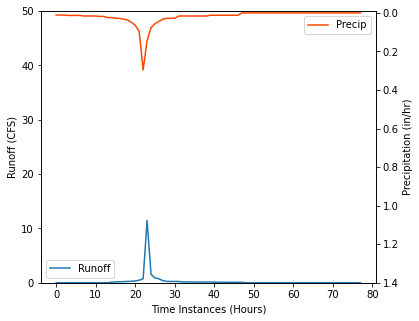

In [56]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73081['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73081['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72671

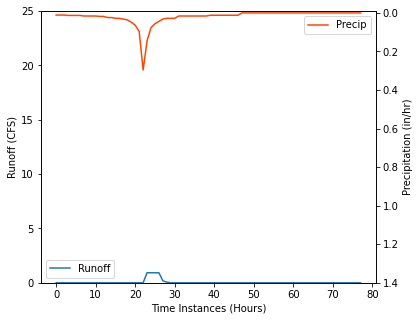

In [57]:
# This is for your Subcatchment 72671
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72671 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5829, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72671.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72671.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72671['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72671['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [58]:
totalrunoff_72671 = (rpt_72671['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72671,'Total Runoff (CF)'] = totalrunoff_72671
pyswmm_results.at[72671,'Total Runoff (CF)']

6974.956153846154

In [59]:
runoff_perc_reduction_72671 = ((27668.113846153836 - totalrunoff_72671)/27668.113846153836) *100
pyswmm_results.at[72671,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72671
pyswmm_results.at[72671,'Total Runoff Volume % Reduction']

runoff_reduction_72671 = 27668.113846153836 - totalrunoff_72671
pyswmm_results.at[72671,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72671
pyswmm_results.at[72671,'Total Runoff Volume Reduction (CF)']

20693.157692307683

### Peak Flow

In [60]:
peakflow_72671 = rpt_72671['Runoff (CFS)'].max()
pyswmm_results.at[72671,'Peak Flow (CFS)'] = peakflow_72671
pyswmm_results.at[72671,'Peak Flow (CFS)']

0.9278

In [61]:
peak_runoff_reduction_percentage_72671 = ((8.2495 - peakflow_72671)/8.2495)*100
pyswmm_results.at[72671,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72671
pyswmm_results.at[72671,'Peak Flow % Reduction'] 

peak_runoff_reduction_72671 = 8.2495 - peakflow_72671
pyswmm_results.at[72671,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72671
pyswmm_results.at[72671,'Peak Flow Reduction (CFS)'] 

7.3217

### TN Load Analysis

In [62]:
load_TN_72671 = (rpt_72671['Runoff (CFS)'].mean() * rpt_72671['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72671,'TN Load (grams)'] = load_TN_72671
pyswmm_results.at[72671,'TN Load (grams)']

12.258183979202746

In [63]:
total_nitrogen_reduction_percentage_72671 = ((379.702889867869 - load_TN_72671)/379.702889867869)*100
pyswmm_results.at[72671,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72671
pyswmm_results.at[72671,'TN Load % Reduction']

total_nitrogen_reduction_72671 = 379.702889867869 - load_TN_72671
pyswmm_results.at[72671,'TN Load Reduction (grams)']=total_nitrogen_reduction_72671
pyswmm_results.at[72671,'TN Load Reduction (grams)']

367.44470588866625

### TP Load Analysis

In [64]:
load_TP_72671 = (rpt_72671['Runoff (CFS)'].mean() * rpt_72671['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72671,'TP Load (grams)'] = load_TP_72671
pyswmm_results.at[72671,'TP Load (grams)']

4.1451450472949585

In [65]:
total_phosphorus_reduction_percentage_72671 = ((128.48948117003803- load_TP_72671)/128.48948117003803)*100
pyswmm_results.at[72671,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72671
pyswmm_results.at[72671,'TP Load % Reduction']

total_phosphorus_reduction_72671 = 128.48948117003803- load_TP_72671
pyswmm_results.at[72671,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72671
pyswmm_results.at[72671,'TP Load Reduction (grams)']

124.34433612274307

### Mean Runoff

In [66]:
mean_runoff_72671= rpt_72671['Runoff (CFS)'].mean()
pyswmm_results.at[72671,'Mean Runoff'] = mean_runoff_72671
pyswmm_results.at[72671,'Mean Runoff']

mean_runoff_reduction_percentage_72671= ((0.19962564102564095-mean_runoff_72671)/0.19962564102564095)*100
pyswmm_results.at[72671,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72671
pyswmm_results.at[72671,'Mean Runoff % Reduction']

74.79063375035322

## Subcatchment 72591

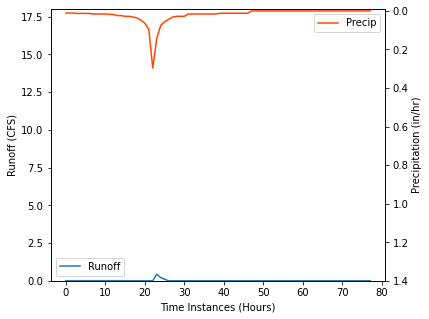

In [67]:
# This is for your Subcatchment 72591
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72591 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5659, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72591.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72591.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72591['Runoff (CFS)']); plt.ylim((-0.001,18)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72591['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [68]:
totalrunoff_72591 = (rpt_72591['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72591,'Total Runoff (CF)'] = totalrunoff_72591
pyswmm_results.at[72591,'Total Runoff (CF)']

1330.2046153846154

In [69]:
runoff_perc_reduction_72591 = ((21573.267692307683 - totalrunoff_72591)/21573.267692307683) *100
pyswmm_results.at[72591,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72591
pyswmm_results.at[72591,'Total Runoff Volume % Reduction']

runoff_reduction_72591 = 21573.267692307683 - totalrunoff_72591
pyswmm_results.at[72591,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72591
pyswmm_results.at[72591,'Total Runoff Volume Reduction (CF)']

20243.063076923067

### Peak Flow

In [70]:
peakflow_72591 = rpt_72591['Runoff (CFS)'].max()
pyswmm_results.at[72591,'Peak Flow (CFS)'] = peakflow_72591
pyswmm_results.at[72591,'Peak Flow (CFS)']

0.4321

In [71]:
peak_runoff_reduction_percentage_72591 = ((6.5208 - peakflow_72591)/6.5208)*100
pyswmm_results.at[72591,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72591
pyswmm_results.at[72591,'Peak Flow % Reduction'] 

peak_runoff_reduction_72591 = 6.5208 - peakflow_72591
pyswmm_results.at[72591,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72591
pyswmm_results.at[72591,'Peak Flow Reduction (CFS)'] 

6.0887

### TN Load Analysis

In [72]:
load_TN_72591 = (rpt_72591['Runoff (CFS)'].mean() * rpt_72591['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72591,'TN Load (grams)'] = load_TN_72591
pyswmm_results.at[72591,'TN Load (grams)']

0.8653783511645916

In [73]:
total_nitrogen_reduction_percentage_72591 = ((210.89661144414222 - load_TN_72591)/210.89661144414222)*100
pyswmm_results.at[72591,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72591
pyswmm_results.at[72591,'TN Load % Reduction']

total_nitrogen_reduction_72591 = 210.89661144414222 - load_TN_72591
pyswmm_results.at[72591,'TN Load Reduction (grams)']=total_nitrogen_reduction_72591
pyswmm_results.at[72591,'TN Load Reduction (grams)']

210.03123309297763

### TP Load Analysis

In [74]:
load_TP_72591 = (rpt_72591['Runoff (CFS)'].mean() * rpt_72591['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72591,'TP Load (grams)'] = load_TP_72591
pyswmm_results.at[72591,'TP Load (grams)']

0.27815732716004743

In [75]:
total_phosphorus_reduction_percentage_72591 = ((67.66736196068736- load_TP_72591)/67.66736196068736)*100
pyswmm_results.at[72591,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72591
pyswmm_results.at[72591,'TP Load % Reduction']

total_phosphorus_reduction_72591 = 67.66736196068736- load_TP_72591
pyswmm_results.at[72591,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72591
pyswmm_results.at[72591,'TP Load Reduction (grams)']

67.38920463352731

### Mean Runoff

In [76]:
mean_runoff_72591= rpt_72591['Runoff (CFS)'].mean()
pyswmm_results.at[72591,'Mean Runoff'] = mean_runoff_72591
pyswmm_results.at[72591,'Mean Runoff']

mean_runoff_reduction_percentage_72591= ((0.15565128205128198-mean_runoff_72591)/0.15565128205128198)*100
pyswmm_results.at[72591,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72591
pyswmm_results.at[72591,'Mean Runoff % Reduction']

93.83401423299948

## Subcatchment 72631

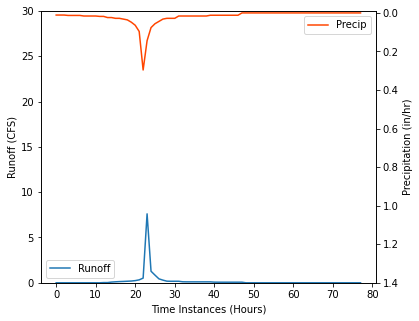

In [77]:
# This is for your Subcatchment 72631
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72631 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5744, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72631.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72631.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72631['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72631['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [78]:
totalrunoff_72631 = (rpt_72631['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72631,'Total Runoff (CF)'] = totalrunoff_72631
pyswmm_results.at[72631,'Total Runoff (CF)']

runoff_perc_reduction_72631 = ((39704.63538461538 - totalrunoff_72631)/39704.63538461538) *100
pyswmm_results.at[72631,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72631
pyswmm_results.at[72631,'Total Runoff Volume % Reduction']

runoff_reduction_72631 = 39704.63538461538 - totalrunoff_72631
pyswmm_results.at[72631,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72631
pyswmm_results.at[72631,'Total Runoff Volume Reduction (CF)']

13991.847692307692

### Peak Flow

In [79]:
peakflow_72631 = rpt_72631['Runoff (CFS)'].max()
pyswmm_results.at[72631,'Peak Flow (CFS)'] = peakflow_72631
pyswmm_results.at[72631,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_72631 = ((11.739 - peakflow_72631)/11.739)*100
pyswmm_results.at[72631,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72631
pyswmm_results.at[72631,'Peak Flow % Reduction'] 

peak_runoff_reduction_72631 = 11.739 - peakflow_72631
pyswmm_results.at[72631,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72631
pyswmm_results.at[72631,'Peak Flow Reduction (CFS)'] 

4.129600000000001

### TN Load Analysis

In [80]:
load_TN_72631 = (rpt_72631['Runoff (CFS)'].mean() * rpt_72631['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72631,'TN Load (grams)'] = load_TN_72631
pyswmm_results.at[72631,'TN Load (grams)']

total_nitrogen_reduction_percentage_72631 = ((654.5203541040532 - load_TN_72631)/654.5203541040532)*100
pyswmm_results.at[72631,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72631
pyswmm_results.at[72631,'TN Load % Reduction']

total_nitrogen_reduction_72631 = 654.5203541040532 - load_TN_72631
pyswmm_results.at[72631,'TN Load Reduction (grams)']=total_nitrogen_reduction_72631
pyswmm_results.at[72631,'TN Load Reduction (grams)']

367.871462651922

### TP Load Analysis

In [81]:
load_TP_72631 = (rpt_72631['Runoff (CFS)'].mean() * rpt_72631['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72631,'TP Load (grams)'] = load_TP_72631
pyswmm_results.at[72631,'TP Load (grams)']

total_phosphorus_reduction_percentage_72631 = ((181.96496102469976- load_TP_72631)/181.96496102469976)*100
pyswmm_results.at[72631,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72631
pyswmm_results.at[72631,'TP Load % Reduction']

total_phosphorus_reduction_72631 = 181.96496102469976- load_TP_72631
pyswmm_results.at[72631,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72631
pyswmm_results.at[72631,'TP Load Reduction (grams)']

102.15357565555422

### Mean Runoff

In [82]:
mean_runoff_72631= rpt_72631['Runoff (CFS)'].mean()
pyswmm_results.at[72631,'Mean Runoff'] = mean_runoff_72631
pyswmm_results.at[72631,'Mean Runoff']

mean_runoff_reduction_percentage_72631= ((0.2864692307692307-mean_runoff_72631)/0.2864692307692307)*100
pyswmm_results.at[72631,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72631
pyswmm_results.at[72631,'Mean Runoff % Reduction']

35.239834232879524

## Subcatchment 72781

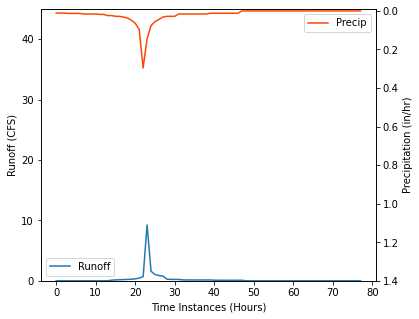

In [83]:
# This is for your Subcatchment 72781
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72781 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5999, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72781.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72781.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72781['Runoff (CFS)']); plt.ylim((-0.001,45)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72781['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [84]:
totalrunoff_72781 = (rpt_72781['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72781,'Total Runoff (CF)'] = totalrunoff_72781
pyswmm_results.at[72781,'Total Runoff (CF)']

runoff_perc_reduction_72781 = ((50077.24615384615 - totalrunoff_72781)/50077.24615384615) *100
pyswmm_results.at[72781,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72781
pyswmm_results.at[72781,'Total Runoff Volume % Reduction']

runoff_reduction_72781 = 50077.24615384615 - totalrunoff_72781
pyswmm_results.at[72781,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72781
pyswmm_results.at[72781,'Total Runoff Volume Reduction (CF)']

16568.030769230747

### Peak Flow

In [85]:
peakflow_72781 = rpt_72781['Runoff (CFS)'].max()
pyswmm_results.at[72781,'Peak Flow (CFS)'] = peakflow_72781
pyswmm_results.at[72781,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_72781 = ((14.7972 - peakflow_72781)/14.7972)*100
pyswmm_results.at[72781,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72781
pyswmm_results.at[72781,'Peak Flow % Reduction'] 

peak_runoff_reduction_72781 = 14.7972 - peakflow_72781
pyswmm_results.at[72781,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72781
pyswmm_results.at[72781,'Peak Flow Reduction (CFS)'] 

5.541399999999999

### TN Load Analysis

In [86]:
load_TN_72781 = (rpt_72781['Runoff (CFS)'].mean() * rpt_72781['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72781,'TN Load (grams)'] = load_TN_72781
pyswmm_results.at[72781,'TN Load (grams)']

total_nitrogen_reduction_percentage_72781 = ((683.9255055065745 - load_TN_72781)/683.9255055065745)*100
pyswmm_results.at[72781,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72781
pyswmm_results.at[72781,'TN Load % Reduction']

total_nitrogen_reduction_72781 = 683.9255055065745 - load_TN_72781
pyswmm_results.at[72781,'TN Load Reduction (grams)']=total_nitrogen_reduction_72781
pyswmm_results.at[72781,'TN Load Reduction (grams)']

363.3156633706501

### TP Load Analysis

In [87]:
load_TP_72781 = (rpt_72781['Runoff (CFS)'].mean() * rpt_72781['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72781,'TP Load (grams)'] = load_TP_72781
pyswmm_results.at[72781,'TP Load (grams)']

total_phosphorus_reduction_percentage_72781 = ((212.70410458338446- load_TP_72781)/212.70410458338446)*100
pyswmm_results.at[72781,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72781
pyswmm_results.at[72781,'TP Load % Reduction']

total_phosphorus_reduction_72781 = 212.70410458338446- load_TP_72781
pyswmm_results.at[72781,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72781
pyswmm_results.at[72781,'TP Load Reduction (grams)']

113.04803071590229

### Mean Runoff

In [88]:
mean_runoff_72781= rpt_72781['Runoff (CFS)'].mean()
pyswmm_results.at[72781,'Mean Runoff'] = mean_runoff_72781
pyswmm_results.at[72781,'Mean Runoff']

mean_runoff_reduction_percentage_72781= ((0.3613076923076923-mean_runoff_72781)/0.3613076923076923)*100
pyswmm_results.at[72781,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72781
pyswmm_results.at[72781,'Mean Runoff % Reduction']

33.084947839046166

## Subcatchment 72731

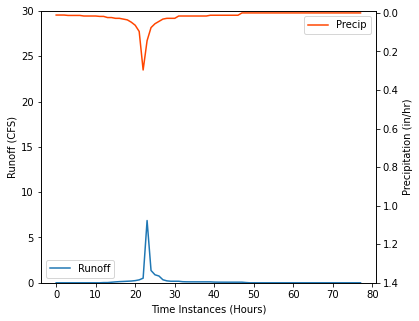

In [89]:
# This is for your Subcatchment 72731
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72731 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5914, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72731.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72731.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72731['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72731['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [90]:
totalrunoff_72731 = (rpt_72731['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72731,'Total Runoff (CF)'] = totalrunoff_72731
pyswmm_results.at[72731,'Total Runoff (CF)']

runoff_perc_reduction_72731 = ((47383.60846153846 - totalrunoff_72731)/47383.60846153846) *100
pyswmm_results.at[72731,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72731
pyswmm_results.at[72731,'Total Runoff Volume % Reduction']

runoff_reduction_72731 = 47383.60846153846 - totalrunoff_72731
pyswmm_results.at[72731,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72731
pyswmm_results.at[72731,'Total Runoff Volume Reduction (CF)']

22030.82538461539

### Peak Flow

In [91]:
peakflow_72731 = rpt_72731['Runoff (CFS)'].max()
pyswmm_results.at[72731,'Peak Flow (CFS)'] = peakflow_72731
pyswmm_results.at[72731,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_72731 = ((13.602 - peakflow_72731)/13.602)*100
pyswmm_results.at[72731,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72731
pyswmm_results.at[72731,'Peak Flow % Reduction'] 

peak_runoff_reduction_72731 = 13.602 - peakflow_72731
pyswmm_results.at[72731,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72731
pyswmm_results.at[72731,'Peak Flow Reduction (CFS)'] 

6.730300000000001

### TN Load Analysis

In [92]:
load_TN_72731 = (rpt_72731['Runoff (CFS)'].mean() * rpt_72731['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72731,'TN Load (grams)'] = load_TN_72731
pyswmm_results.at[72731,'TN Load (grams)']

total_nitrogen_reduction_percentage_72731 = ((678.7201716164893 - load_TN_72731)/678.7201716164893)*100
pyswmm_results.at[72731,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72731
pyswmm_results.at[72731,'TN Load % Reduction']

total_nitrogen_reduction_72731 = 678.7201716164893 - load_TN_72731
pyswmm_results.at[72731,'TN Load Reduction (grams)']=total_nitrogen_reduction_72731
pyswmm_results.at[72731,'TN Load Reduction (grams)']

433.940579976638

### TP Load Analysis

In [93]:
load_TP_72731 = (rpt_72731['Runoff (CFS)'].mean() * rpt_72731['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72731,'TP Load (grams)'] = load_TP_72731
pyswmm_results.at[72731,'TP Load (grams)']

total_phosphorus_reduction_percentage_72731 = ((194.86369890692404- load_TP_72731)/194.86369890692404)*100
pyswmm_results.at[72731,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72731
pyswmm_results.at[72731,'TP Load % Reduction']

total_phosphorus_reduction_72731 = 194.86369890692404- load_TP_72731
pyswmm_results.at[72731,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72731
pyswmm_results.at[72731,'TP Load Reduction (grams)']

124.46252964754359

### Mean Runoff

In [94]:
mean_runoff_72731= rpt_72731['Runoff (CFS)'].mean()
pyswmm_results.at[72731,'Mean Runoff'] = mean_runoff_72731
pyswmm_results.at[72731,'Mean Runoff']

mean_runoff_reduction_percentage_72731= ((0.34187307692307695-mean_runoff_72731)/00.34187307692307695)*100
pyswmm_results.at[72731,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72731
pyswmm_results.at[72731,'Mean Runoff % Reduction']

46.49461301052649

## Subcatchment 72951

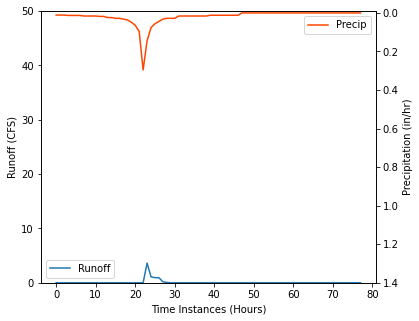

In [95]:
# This is for your Subcatchment 72951
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72951 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6169, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72951.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72951.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72951['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72951['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


### Total Runoff

In [96]:
totalrunoff_72951 = (rpt_72951['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[72951,'Total Runoff (CF)'] = totalrunoff_72951
pyswmm_results.at[72951,'Total Runoff (CF)']

runoff_perc_reduction_72951 = ((39283.85999999999 - totalrunoff_72951)/39283.85999999999) *100
pyswmm_results.at[72951,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_72951
pyswmm_results.at[72951,'Total Runoff Volume % Reduction']

runoff_reduction_72951 = 39283.85999999999 - totalrunoff_72951
pyswmm_results.at[72951,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_72951
pyswmm_results.at[72951,'Total Runoff Volume Reduction (CF)']

27114.957692307686

### Peak Flow

In [97]:
peakflow_72951 = rpt_72951['Runoff (CFS)'].max()
pyswmm_results.at[72951,'Peak Flow (CFS)'] = peakflow_72951
pyswmm_results.at[72951,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_72951 = ((11.8811 - peakflow_72951)/11.8811)*100
pyswmm_results.at[72951,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_72951
pyswmm_results.at[72951,'Peak Flow % Reduction'] 

peak_runoff_reduction_72951 = (11.8811 - peakflow_72951)
pyswmm_results.at[72951,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_72951
pyswmm_results.at[72951,'Peak Flow Reduction (CFS)'] 

8.2564

### TN Load Analysis

In [98]:
load_TN_72951 = (rpt_72951['Runoff (CFS)'].mean() * rpt_72951['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72951,'TN Load (grams)'] = load_TN_72951
pyswmm_results.at[72951,'TN Load (grams)']

total_nitrogen_reduction_percentage_72951 = ((320.88265582153844 - load_TN_72951)/320.88265582153844)*100
pyswmm_results.at[72951,'TN Load % Reduction']=total_nitrogen_reduction_percentage_72951
pyswmm_results.at[72951,'TN Load % Reduction']

total_nitrogen_reduction_72951 = 320.88265582153844 - load_TN_72951
pyswmm_results.at[72951,'TN Load Reduction (grams)']=total_nitrogen_reduction_72951
pyswmm_results.at[72951,'TN Load Reduction (grams)']

307.28482633842344

### TP Load Analysis

In [99]:
load_TP_72951 = (rpt_72951['Runoff (CFS)'].mean() * rpt_72951['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[72951,'TP Load (grams)'] = load_TP_72951
pyswmm_results.at[72951,'TP Load (grams)']

total_phosphorus_reduction_percentage_72951 = ((92.41420487660302 - load_TP_72951)/92.41420487660302)*100
pyswmm_results.at[72951,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_72951
pyswmm_results.at[72951,'TP Load % Reduction']

total_phosphorus_reduction_72951 = 92.41420487660302 - load_TP_72951
pyswmm_results.at[72951,'TP Load Reduction (grams)'] = total_phosphorus_reduction_72951
pyswmm_results.at[72951,'TP Load Reduction (grams)']

88.49124432396945

### Mean Runoff

In [100]:
mean_runoff_72951= rpt_72951['Runoff (CFS)'].mean()
pyswmm_results.at[72951,'Mean Runoff'] = mean_runoff_72951
pyswmm_results.at[72951,'Mean Runoff']

mean_runoff_reduction_percentage_72951= ((0.28343333333333326-mean_runoff_72951)/0.28343333333333326)*100
pyswmm_results.at[72951,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_72951
pyswmm_results.at[72951,'Mean Runoff % Reduction']

69.02315020038175

## Subcatchment 73211

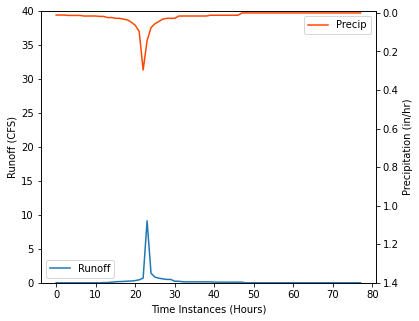

In [101]:
# This is for your Subcatchment 73211
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73211 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6764, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73211.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73211.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73211['Runoff (CFS)']); plt.ylim((-0.001,40)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73211['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [102]:
totalrunoff_73211 = (rpt_73211['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73211,'Total Runoff (CF)'] = totalrunoff_73211
pyswmm_results.at[73211,'Total Runoff (CF)']

runoff_perc_reduction_73211 = ((40660.08692307693 - totalrunoff_73211)/40660.08692307693) *100
pyswmm_results.at[73211,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73211
pyswmm_results.at[73211,'Total Runoff Volume % Reduction']

runoff_reduction_73211 = 40660.08692307693 - totalrunoff_73211
pyswmm_results.at[73211,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73211
pyswmm_results.at[73211,'Total Runoff Volume Reduction (CF)']

7735.834615384621

### Peak Flow

In [103]:
peakflow_73211 = rpt_73211['Runoff (CFS)'].max()
pyswmm_results.at[73211,'Peak Flow (CFS)'] = peakflow_73211
pyswmm_results.at[73211,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73211 = ((11.9934 - peakflow_73211)/11.9934)*100
pyswmm_results.at[73211,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73211
pyswmm_results.at[73211,'Peak Flow % Reduction'] 

peak_runoff_reduction_73211 = 11.9934 - peakflow_73211
pyswmm_results.at[73211,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73211
pyswmm_results.at[73211,'Peak Flow Reduction (CFS)'] 

2.8663999999999987

### TN Load Analysis

In [104]:
load_TN_73211 = (rpt_73211['Runoff (CFS)'].mean() * rpt_73211['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73211,'TN Load (grams)'] = load_TN_73211
pyswmm_results.at[73211,'TN Load (grams)']

total_nitrogen_reduction_percentage_73211 = ((438.4038130344428 - load_TN_73211)/438.4038130344428)*100
pyswmm_results.at[73211,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73211
pyswmm_results.at[73211,'TN Load % Reduction']

total_nitrogen_reduction_73211 = 438.4038130344428 - load_TN_73211
pyswmm_results.at[73211,'TN Load Reduction (grams)']=total_nitrogen_reduction_73211
pyswmm_results.at[73211,'TN Load Reduction (grams)']

164.9024637911795

### TP Load Analysis

In [105]:
load_TP_73211 = (rpt_73211['Runoff (CFS)'].mean() * rpt_73211['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73211,'TP Load (grams)'] = load_TP_73211
pyswmm_results.at[73211,'TP Load (grams)']

total_phosphorus_reduction_percentage_73211 = ((126.87140649936141 - load_TP_73211)/126.87140649936141)*100
pyswmm_results.at[73211,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73211
pyswmm_results.at[73211,'TP Load % Reduction']

total_phosphorus_reduction_73211 = 126.87140649936141 - load_TP_73211
pyswmm_results.at[73211,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73211
pyswmm_results.at[73211,'TP Load Reduction (grams)']

47.58924368446044

### Mean Runoff

In [106]:
mean_runoff_73211= rpt_73211['Runoff (CFS)'].mean()
pyswmm_results.at[73211,'Mean Runoff'] = mean_runoff_73211
pyswmm_results.at[73211,'Mean Runoff']

mean_runoff_reduction_percentage_73211= ((0.2933628205128206-mean_runoff_73211)/0.2933628205128206)*100
pyswmm_results.at[73211,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73211
pyswmm_results.at[73211,'Mean Runoff % Reduction']

19.02562242431924

## Subcatchment 73181

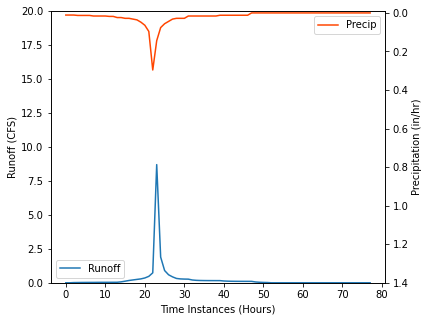

In [107]:
# This is for your Subcatchment 73181
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73181 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6594, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73181.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73181.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73181['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73181['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [108]:
totalrunoff_73181 = (rpt_73181['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73181,'Total Runoff (CF)'] = totalrunoff_73181
pyswmm_results.at[73181,'Total Runoff (CF)']

runoff_perc_reduction_73181 = ((38669.22230769232 - totalrunoff_73181)/38669.22230769232) *100
pyswmm_results.at[73181,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73181
pyswmm_results.at[73181,'Total Runoff Volume % Reduction']

runoff_reduction_73181 = 38669.22230769232 - totalrunoff_73181
pyswmm_results.at[73181,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73181
pyswmm_results.at[73181,'Total Runoff Volume Reduction (CF)']

4806.75461538462

### Peak Flow

In [109]:
peakflow_73181 = rpt_73181['Runoff (CFS)'].max()
pyswmm_results.at[73181,'Peak Flow (CFS)'] = peakflow_73181
pyswmm_results.at[73181,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73181 = ((9.9181 - peakflow_73181)/9.9181)*100
pyswmm_results.at[73181,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73181
pyswmm_results.at[73181,'Peak Flow % Reduction'] 

peak_runoff_reduction_73181 = 9.9181 - peakflow_73181
pyswmm_results.at[73181,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73181
pyswmm_results.at[73181,'Peak Flow Reduction (CFS)'] 

1.2215000000000007

### TN Load Analysis

In [110]:
load_TN_73181 = (rpt_73181['Runoff (CFS)'].mean() * rpt_73181['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73181,'TN Load (grams)'] = load_TN_73181
pyswmm_results.at[73181,'TN Load (grams)']

total_nitrogen_reduction_percentage_73181 = ((839.0982134094918 - load_TN_73181)/839.0982134094918)*100
pyswmm_results.at[73181,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73181
pyswmm_results.at[73181,'TN Load % Reduction']

total_nitrogen_reduction_73181 = 839.0982134094918 - load_TN_73181
pyswmm_results.at[73181,'TN Load Reduction (grams)']=total_nitrogen_reduction_73181
pyswmm_results.at[73181,'TN Load Reduction (grams)']

164.8234762591452

### TP Load Analysis

In [111]:
load_TP_73181 = (rpt_73181['Runoff (CFS)'].mean() * rpt_73181['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73181,'TP Load (grams)'] = load_TP_73181
pyswmm_results.at[73181,'TP Load (grams)']

total_phosphorus_reduction_percentage_73181 = ((227.67340602749013 - load_TP_73181)/227.67340602749013)*100
pyswmm_results.at[73181,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73181
pyswmm_results.at[73181,'TP Load % Reduction']

total_phosphorus_reduction_73181 = 227.67340602749013 - load_TP_73181
pyswmm_results.at[73181,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73181
pyswmm_results.at[73181,'TP Load Reduction (grams)']

44.46648506718799

### Mean Runoff

In [112]:
mean_runoff_73181= rpt_73181['Runoff (CFS)'].mean()
pyswmm_results.at[73181,'Mean Runoff'] = mean_runoff_73181
pyswmm_results.at[73181,'Mean Runoff']

mean_runoff_reduction_percentage_73181= ((0.278998717948718-mean_runoff_73181)/0.278998717948718)*100
pyswmm_results.at[73181,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73181
pyswmm_results.at[73181,'Mean Runoff % Reduction']

12.430440356770319

## Subcatchment 73171

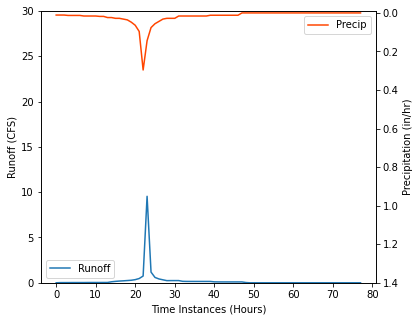

In [113]:
# This is for your Subcatchment 73171
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73171 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6509, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73171.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73171.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73171['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73171['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [114]:
totalrunoff_73171 = (rpt_73171['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73171,'Total Runoff (CF)'] = totalrunoff_73171
pyswmm_results.at[73171,'Total Runoff (CF)']

runoff_perc_reduction_73171 = ((37062.528461538466 - totalrunoff_73171)/37062.528461538466) *100
pyswmm_results.at[73171,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73171
pyswmm_results.at[73171,'Total Runoff Volume % Reduction']

runoff_reduction_73171 = 37062.528461538466 - totalrunoff_73171
pyswmm_results.at[73171,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73171
pyswmm_results.at[73171,'Total Runoff Volume Reduction (CF)']

4775.125384615403

### Peak Flow

In [115]:
peakflow_73171 = rpt_73171['Runoff (CFS)'].max()
pyswmm_results.at[73171,'Peak Flow (CFS)'] = peakflow_73171
pyswmm_results.at[73171,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73171 = ((10.944 - peakflow_73171)/10.944)*100
pyswmm_results.at[73171,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73171
pyswmm_results.at[73171,'Peak Flow % Reduction'] 

peak_runoff_reduction_73171 = 10.944 - peakflow_73171
pyswmm_results.at[73171,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73171
pyswmm_results.at[73171,'Peak Flow Reduction (CFS)'] 

1.3975000000000009

### TN Load Analysis

In [116]:
load_TN_73171 = (rpt_73171['Runoff (CFS)'].mean() * rpt_73171['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73171,'TN Load (grams)'] = load_TN_73171
pyswmm_results.at[73171,'TN Load (grams)']

total_nitrogen_reduction_percentage_73171 = ((649.0705642888561 - load_TN_73171)/649.0705642888561)*100
pyswmm_results.at[73171,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73171
pyswmm_results.at[73171,'TN Load % Reduction']

total_nitrogen_reduction_73171 = 649.0705642888561 - load_TN_73171
pyswmm_results.at[73171,'TN Load Reduction (grams)']=total_nitrogen_reduction_73171
pyswmm_results.at[73171,'TN Load Reduction (grams)']

141.50676227865182

### TP Load Analysis

In [117]:
load_TP_73171 = (rpt_73171['Runoff (CFS)'].mean() * rpt_73171['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73171,'TP Load (grams)'] = load_TP_73171
pyswmm_results.at[73171,'TP Load (grams)']

total_phosphorus_reduction_percentage_73171 = ((183.41894553038333 - load_TP_73171)/183.41894553038333)*100
pyswmm_results.at[73171,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73171
pyswmm_results.at[73171,'TP Load % Reduction']

total_phosphorus_reduction_73171 = 183.41894553038333 - load_TP_73171
pyswmm_results.at[73171,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73171
pyswmm_results.at[73171,'TP Load Reduction (grams)']

40.24098974185978

### Mean Runoff

In [118]:
mean_runoff_73171= rpt_73171['Runoff (CFS)'].mean()
pyswmm_results.at[73171,'Mean Runoff'] = mean_runoff_73171
pyswmm_results.at[73171,'Mean Runoff']

mean_runoff_reduction_percentage_73171= ((0.26740641025641027-mean_runoff_73171)/0.26740641025641027)*100
pyswmm_results.at[73171,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73171
pyswmm_results.at[73171,'Mean Runoff % Reduction']

12.883970907626473

## Subcatchment 73121

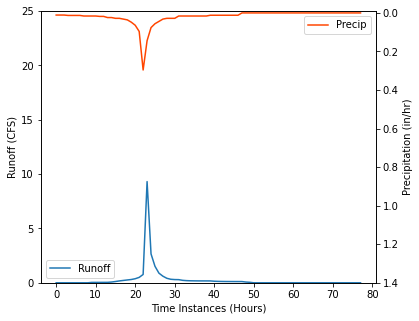

In [119]:
# This is for your Subcatchment 73121
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73121 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6424, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73121.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73121.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73121['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73121['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [120]:
totalrunoff_73121 = (rpt_73121['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73121,'Total Runoff (CF)'] = totalrunoff_73121
pyswmm_results.at[73121,'Total Runoff (CF)']

runoff_perc_reduction_73121 = ((63324.74076923076 - totalrunoff_73121)/63324.74076923076) *100
pyswmm_results.at[73121,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73121
pyswmm_results.at[73121,'Total Runoff Volume % Reduction']

runoff_reduction_73121 = 63324.74076923076 - totalrunoff_73121
pyswmm_results.at[73121,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73121
pyswmm_results.at[73121,'Total Runoff Volume Reduction (CF)']

24574.31307692307

### Peak Flow

In [121]:
peakflow_73121 = rpt_73121['Runoff (CFS)'].max()
pyswmm_results.at[73121,'Peak Flow (CFS)'] = peakflow_73121
pyswmm_results.at[73121,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73121 = ((15.6503 - peakflow_73121)/15.6503)*100
pyswmm_results.at[73121,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73121
pyswmm_results.at[73121,'Peak Flow % Reduction'] 

peak_runoff_reduction_73121 = 15.6503 - peakflow_73121
pyswmm_results.at[73121,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73121
pyswmm_results.at[73121,'Peak Flow Reduction (CFS)'] 

6.341899999999999

### TN Load Analysis

In [122]:
load_TN_73121 = (rpt_73121['Runoff (CFS)'].mean() * rpt_73121['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73121,'TN Load (grams)'] = load_TN_73121
pyswmm_results.at[73121,'TN Load (grams)']

total_nitrogen_reduction_percentage_73121 = ((1181.826433718497 - load_TN_73121)/1181.826433718497)*100
pyswmm_results.at[73121,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73121
pyswmm_results.at[73121,'TN Load % Reduction']

total_nitrogen_reduction_73121 = 1181.826433718497 - load_TN_73121
pyswmm_results.at[73121,'TN Load Reduction (grams)']=total_nitrogen_reduction_73121
pyswmm_results.at[73121,'TN Load Reduction (grams)']

617.4545820238166

### TP Load Analysis

In [123]:
load_TP_73121 = (rpt_73121['Runoff (CFS)'].mean() * rpt_73121['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73121,'TP Load (grams)'] = load_TP_73121
pyswmm_results.at[73121,'TP Load (grams)']

total_phosphorus_reduction_percentage_73121 = ((372.97603603814355 - load_TP_73121)/372.97603603814355)*100
pyswmm_results.at[73121,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73121
pyswmm_results.at[73121,'TP Load % Reduction']

total_phosphorus_reduction_73121 = 372.97603603814355 - load_TP_73121
pyswmm_results.at[73121,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73121
pyswmm_results.at[73121,'TP Load Reduction (grams)']

194.9340061501163

### Mean Runoff

In [124]:
mean_runoff_73121= rpt_73121['Runoff (CFS)'].mean()
pyswmm_results.at[73121,'Mean Runoff'] = mean_runoff_73121
pyswmm_results.at[73121,'Mean Runoff']

mean_runoff_reduction_percentage_73121= ((0.45688846153846147-mean_runoff_73121)/0.45688846153846147)*100
pyswmm_results.at[73121,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73121
pyswmm_results.at[73121,'Mean Runoff % Reduction']

38.80681196386931

## Subcatchment 73201

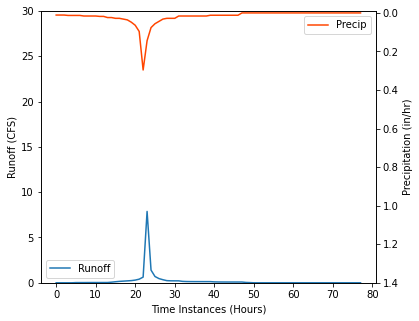

In [125]:
# This is for your Subcatchment 73201
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73201 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6679, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73201.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73201.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73201['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73201['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [126]:
totalrunoff_73201 = (rpt_73201['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73201,'Total Runoff (CF)'] = totalrunoff_73201
pyswmm_results.at[73201,'Total Runoff (CF)']

runoff_perc_reduction_73201 = ((45618.768461538464 - totalrunoff_73201)/45618.768461538464) *100
pyswmm_results.at[73201,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73201
pyswmm_results.at[73201,'Total Runoff Volume % Reduction']

runoff_reduction_73201 = 45618.768461538464 - totalrunoff_73201
pyswmm_results.at[73201,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73201
pyswmm_results.at[73201,'Total Runoff Volume Reduction (CF)']

17145.886153846153

### Peak Flow

In [127]:
peakflow_73201 = rpt_73201['Runoff (CFS)'].max()
pyswmm_results.at[73201,'Peak Flow (CFS)'] = peakflow_73201
pyswmm_results.at[73201,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73201 = ((12.6269 - peakflow_73201)/12.6269)*100
pyswmm_results.at[73201,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73201
pyswmm_results.at[73201,'Peak Flow % Reduction'] 

peak_runoff_reduction_73201 = 12.6269 - peakflow_73201
pyswmm_results.at[73201,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73201
pyswmm_results.at[73201,'Peak Flow Reduction (CFS)'] 

4.750699999999999

### TN Load Analysis

In [128]:
load_TN_73201 = (rpt_73201['Runoff (CFS)'].mean() * rpt_73201['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73201,'TN Load (grams)'] = load_TN_73201
pyswmm_results.at[73201,'TN Load (grams)']

total_nitrogen_reduction_percentage_73201 = ((828.5428036836543 - load_TN_73201)/828.5428036836543)*100
pyswmm_results.at[73201,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73201
pyswmm_results.at[73201,'TN Load % Reduction']

total_nitrogen_reduction_73201 = 828.5428036836543 - load_TN_73201
pyswmm_results.at[73201,'TN Load Reduction (grams)']=total_nitrogen_reduction_73201
pyswmm_results.at[73201,'TN Load Reduction (grams)']

439.3978726681325

### TP Load Analysis

In [129]:
load_TP_73201 = (rpt_73201['Runoff (CFS)'].mean() * rpt_73201['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73201,'TP Load (grams)'] = load_TP_73201
pyswmm_results.at[73201,'TP Load (grams)']

total_phosphorus_reduction_percentage_73201 = ((226.40885624656158 - load_TP_73201)/226.40885624656158)*100
pyswmm_results.at[73201,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73201
pyswmm_results.at[73201,'TP Load % Reduction']

total_phosphorus_reduction_73201 = 226.40885624656158 - load_TP_73201
pyswmm_results.at[73201,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73201
pyswmm_results.at[73201,'TP Load Reduction (grams)']

119.98241563414061

### Mean Runoff

In [130]:
mean_runoff_73201= rpt_73201['Runoff (CFS)'].mean()
pyswmm_results.at[73201,'Mean Runoff'] = mean_runoff_73201
pyswmm_results.at[73201,'Mean Runoff']

mean_runoff_reduction_percentage_73201= ((0.3291397435897436-mean_runoff_73201)/0.3291397435897436)*100
pyswmm_results.at[73201,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73201
pyswmm_results.at[73201,'Mean Runoff % Reduction']

37.58515789022666

## Subcatchment 73301

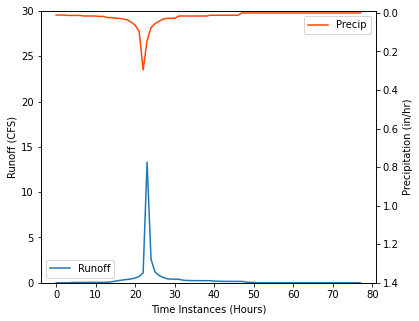

In [131]:
## This is for your Subcatchment 73301
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73301 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6934, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73301.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73301.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73301['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73301['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [132]:
totalrunoff_73301 = (rpt_73301['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73301,'Total Runoff (CF)'] = totalrunoff_73301
pyswmm_results.at[73301,'Total Runoff (CF)']

runoff_perc_reduction_73301 = ((57276.09461538463 - totalrunoff_73301)/57276.09461538463) *100
pyswmm_results.at[73301,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73301
pyswmm_results.at[73301,'Total Runoff Volume % Reduction']

runoff_reduction_73301 = 57276.09461538463 - totalrunoff_73301
pyswmm_results.at[73301,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73301
pyswmm_results.at[73301,'Total Runoff Volume Reduction (CF)']

7466.98615384617

### Peak Runoff

In [133]:
peakflow_73301 = rpt_73301['Runoff (CFS)'].max()
pyswmm_results.at[73301,'Peak Flow (CFS)'] = peakflow_73301
pyswmm_results.at[73301,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73301 = ((15.2104 - peakflow_73301)/15.2104)*100
pyswmm_results.at[73301,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73301
pyswmm_results.at[73301,'Peak Flow % Reduction'] 

peak_runoff_reduction_73301 = 15.2104 - peakflow_73301
pyswmm_results.at[73301,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73301
pyswmm_results.at[73301,'Peak Flow Reduction (CFS)'] 

1.8938000000000006

### TN Load Analysis

In [134]:
load_TN_73301 = (rpt_73301['Runoff (CFS)'].mean() * rpt_73301['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73301,'TN Load (grams)'] = load_TN_73301
pyswmm_results.at[73301,'TN Load (grams)']

total_nitrogen_reduction_percentage_73301 = ((1271.550561347861 - load_TN_73301)/1271.550561347861)*100
pyswmm_results.at[73301,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73301
pyswmm_results.at[73301,'TN Load % Reduction']

total_nitrogen_reduction_73301 = 1271.550561347861 - load_TN_73301
pyswmm_results.at[73301,'TN Load Reduction (grams)']=total_nitrogen_reduction_73301
pyswmm_results.at[73301,'TN Load Reduction (grams)']

271.35354910862407

### TP Load Analysis

In [135]:
load_TP_73301 = (rpt_73301['Runoff (CFS)'].mean() * rpt_73301['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73301,'TP Load (grams)'] = load_TP_73301
pyswmm_results.at[73301,'TP Load (grams)']

total_phosphorus_reduction_percentage_73301 = ((366.29439247618944 - load_TP_73301)/366.29439247618944)*100
pyswmm_results.at[73301,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73301
pyswmm_results.at[73301,'TP Load % Reduction']

total_phosphorus_reduction_73301 = 366.29439247618944 - load_TP_73301
pyswmm_results.at[73301,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73301
pyswmm_results.at[73301,'TP Load Reduction (grams)']

78.5295767407344

### Mean Runoff

In [136]:
mean_runoff_73301= rpt_73301['Runoff (CFS)'].mean()
pyswmm_results.at[73301,'Mean Runoff'] = mean_runoff_73301
pyswmm_results.at[73301,'Mean Runoff']

mean_runoff_reduction_percentage_73301= ((0.413247435897436-mean_runoff_73301)/0.413247435897436)*100
pyswmm_results.at[73301,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73301
pyswmm_results.at[73301,'Mean Runoff % Reduction']

13.03682837314209

## Subcatchment 73321

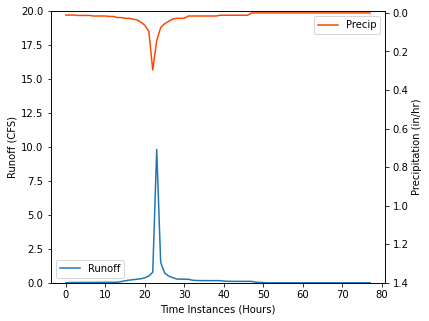

In [137]:
# This is for your Subcatchment 73321
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73321 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7019, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73321.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73321.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73321['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73321['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [138]:
totalrunoff_73321 = (rpt_73321['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73321,'Total Runoff (CF)'] = totalrunoff_73321
pyswmm_results.at[73321,'Total Runoff (CF)']

runoff_perc_reduction_73321 = ((40647.11538461539 - totalrunoff_73321)/40647.11538461539) *100
pyswmm_results.at[73321,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73321
pyswmm_results.at[73321,'Total Runoff Volume % Reduction']

runoff_reduction_73321 = 40647.11538461539 - totalrunoff_73321
pyswmm_results.at[73321,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73321
pyswmm_results.at[73321,'Total Runoff Volume Reduction (CF)']

6006.533076923079

### Peak Flow

In [139]:
peakflow_73321 = rpt_73321['Runoff (CFS)'].max()
pyswmm_results.at[73321,'Peak Flow (CFS)'] = peakflow_73321
pyswmm_results.at[73321,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73321 = ((11.4529 - peakflow_73321)/11.4529)*100
pyswmm_results.at[73321,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73321
pyswmm_results.at[73321,'Peak Flow % Reduction'] 

peak_runoff_reduction_73321 = 11.4529 - peakflow_73321
pyswmm_results.at[73321,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73321
pyswmm_results.at[73321,'Peak Flow Reduction (CFS)'] 

1.6390999999999991

### TN Load Analysis

In [140]:
load_TN_73321 = (rpt_73321['Runoff (CFS)'].mean() * rpt_73321['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73321,'TN Load (grams)'] = load_TN_73321
pyswmm_results.at[73321,'TN Load (grams)']

total_nitrogen_reduction_percentage_73321 = ((903.0893551242593 - load_TN_73321)/903.0893551242593)*100
pyswmm_results.at[73321,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73321
pyswmm_results.at[73321,'TN Load % Reduction']

total_nitrogen_reduction_73321 = 903.0893551242593 - load_TN_73321
pyswmm_results.at[73321,'TN Load Reduction (grams)']=total_nitrogen_reduction_73321
pyswmm_results.at[73321,'TN Load Reduction (grams)']

222.62675182985163

### TP Load Analysis

In [141]:
load_TP_73321 = (rpt_73321['Runoff (CFS)'].mean() * rpt_73321['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73321,'TP Load (grams)'] = load_TP_73321
pyswmm_results.at[73321,'TP Load (grams)']

total_phosphorus_reduction_percentage_73321 = ((230.93706548520734 - load_TP_73321)/230.93706548520734)*100
pyswmm_results.at[73321,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73321
pyswmm_results.at[73321,'TP Load % Reduction']

total_phosphorus_reduction_73321 = 230.93706548520734 - load_TP_73321
pyswmm_results.at[73321,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73321
pyswmm_results.at[73321,'TP Load Reduction (grams)']

56.92606839073662

### Mean Runoff

In [142]:
mean_runoff_73321= rpt_73321['Runoff (CFS)'].mean()
pyswmm_results.at[73321,'Mean Runoff'] = mean_runoff_73321
pyswmm_results.at[73321,'Mean Runoff']

mean_runoff_reduction_percentage_73321= ((0.29326923076923084-mean_runoff_73321)/0.29326923076923084)*100
pyswmm_results.at[73321,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73321
pyswmm_results.at[73321,'Mean Runoff % Reduction']

14.77726775956285

## Subcatchment 73391

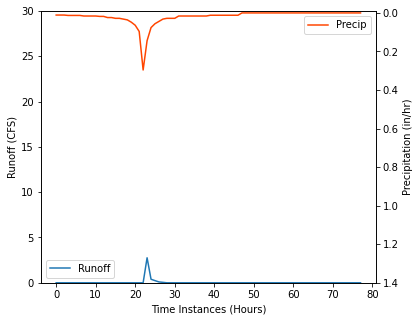

In [143]:
# This is for your Subcatchment 73391
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73391 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7189, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73391.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73391.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73391['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73391['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [144]:
totalrunoff_73391 = (rpt_73391['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73391,'Total Runoff (CF)'] = totalrunoff_73391
pyswmm_results.at[73391,'Total Runoff (CF)']

runoff_perc_reduction_73391 = ((15322.763076923076 - totalrunoff_73391)/15322.763076923076) *100
pyswmm_results.at[73391,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73391
pyswmm_results.at[73391,'Total Runoff Volume % Reduction']

runoff_reduction_73391 = 15322.763076923076 - totalrunoff_73391
pyswmm_results.at[73391,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73391
pyswmm_results.at[73391,'Total Runoff Volume Reduction (CF)']

9045.426923076922

### Peak Flow

In [145]:
peakflow_73391 = rpt_73391['Runoff (CFS)'].max()
pyswmm_results.at[73391,'Peak Flow (CFS)'] = peakflow_73391
pyswmm_results.at[73391,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73391 = ((4.6487 - peakflow_73391)/4.6487)*100
pyswmm_results.at[73391,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73391
pyswmm_results.at[73391,'Peak Flow % Reduction'] 

peak_runoff_reduction_73391 = 4.6487 - peakflow_73391
pyswmm_results.at[73391,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73391
pyswmm_results.at[73391,'Peak Flow Reduction (CFS)'] 

1.8889999999999998

### TN Load Analysis

In [146]:
load_TN_73391 = (rpt_73391['Runoff (CFS)'].mean() * rpt_73391['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73391,'TN Load (grams)'] = load_TN_73391
pyswmm_results.at[73391,'TN Load (grams)']

total_nitrogen_reduction_percentage_73391 = ((145.82095975713182 - load_TN_73391)/145.82095975713182)*100
pyswmm_results.at[73391,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73391
pyswmm_results.at[73391,'TN Load % Reduction']

total_nitrogen_reduction_73391 = 145.82095975713182 - load_TN_73391
pyswmm_results.at[73391,'TN Load Reduction (grams)']=total_nitrogen_reduction_73391
pyswmm_results.at[73391,'TN Load Reduction (grams)']

138.00205946984178

### TP Load Analysis

In [147]:
load_TP_73391 = (rpt_73391['Runoff (CFS)'].mean() * rpt_73391['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73391,'TP Load (grams)'] = load_TP_73391
pyswmm_results.at[73391,'TP Load (grams)']

total_phosphorus_reduction_percentage_73391 = ((44.25694498465477 - load_TP_73391)/44.25694498465477)*100
pyswmm_results.at[73391,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73391
pyswmm_results.at[73391,'TP Load % Reduction']

total_phosphorus_reduction_73391 = 44.25694498465477 - load_TP_73391
pyswmm_results.at[73391,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73391
pyswmm_results.at[73391,'TP Load Reduction (grams)']

41.88689068597169

### Mean Runoff

In [148]:
mean_runoff_73391= rpt_73391['Runoff (CFS)'].mean()
pyswmm_results.at[73391,'Mean Runoff'] = mean_runoff_73391
pyswmm_results.at[73391,'Mean Runoff']

mean_runoff_reduction_percentage_73391= ((0.11055384615384616-mean_runoff_73391)/0.11055384615384616)*100
pyswmm_results.at[73391,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73391
pyswmm_results.at[73391,'Mean Runoff % Reduction']

59.032609704054174

## Subcatchment 73551

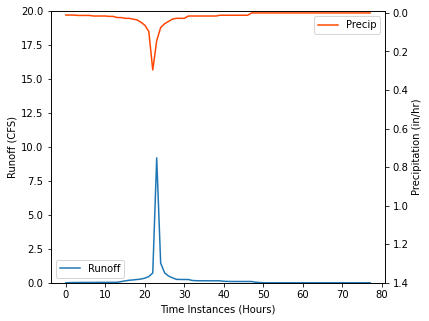

In [149]:
# This is for your Subcatchment 73551
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73551 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7699, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73551.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73551.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73551['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73551['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [150]:
totalrunoff_73551 = (rpt_73551['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73551,'Total Runoff (CF)'] = totalrunoff_73551
pyswmm_results.at[73551,'Total Runoff (CF)']

runoff_perc_reduction_73551 = ((38727.86076923077 - totalrunoff_73551)/38727.86076923077) *100
pyswmm_results.at[73551,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73551
pyswmm_results.at[73551,'Total Runoff Volume % Reduction']

runoff_reduction_73551 = 38727.86076923077 - totalrunoff_73551
pyswmm_results.at[73551,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73551
pyswmm_results.at[73551,'Total Runoff Volume Reduction (CF)']

6292.795384615376

### Peak Flow

In [151]:
peakflow_73551 = rpt_73551['Runoff (CFS)'].max()
pyswmm_results.at[73551,'Peak Flow (CFS)'] = peakflow_73551
pyswmm_results.at[73551,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73551 = ((11.1143 - peakflow_73551)/11.1143)*100
pyswmm_results.at[73551,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73551
pyswmm_results.at[73551,'Peak Flow % Reduction'] 

peak_runoff_reduction_73551 = 11.1143 - peakflow_73551
pyswmm_results.at[73551,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73551
pyswmm_results.at[73551,'Peak Flow Reduction (CFS)'] 

1.9208999999999996

### TN Load Analysis

In [152]:
load_TN_73551 = (rpt_73551['Runoff (CFS)'].mean() * rpt_73551['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73551,'TN Load (grams)'] = load_TN_73551
pyswmm_results.at[73551,'TN Load (grams)']

total_nitrogen_reduction_percentage_73551 = ((811.9421131050182 - load_TN_73551)/811.9421131050182)*100
pyswmm_results.at[73551,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73551
pyswmm_results.at[73551,'TN Load % Reduction']

total_nitrogen_reduction_73551 = 811.9421131050182 - load_TN_73551
pyswmm_results.at[73551,'TN Load Reduction (grams)']=total_nitrogen_reduction_73551
pyswmm_results.at[73551,'TN Load Reduction (grams)']

198.98964333076708

### TP Load Analysis

In [153]:
load_TP_73551 = (rpt_73551['Runoff (CFS)'].mean() * rpt_73551['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73551,'TP Load (grams)'] = load_TP_73551
pyswmm_results.at[73551,'TP Load (grams)']

total_phosphorus_reduction_percentage_73551 = ((210.8940553519529 - load_TP_73551)/210.8940553519529)*100
pyswmm_results.at[73551,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73551
pyswmm_results.at[73551,'TP Load % Reduction']

total_phosphorus_reduction_73551 = 210.8940553519529 - load_TP_73551
pyswmm_results.at[73551,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73551
pyswmm_results.at[73551,'TP Load Reduction (grams)']

51.74189741383401

### Mean Runoff

In [154]:
mean_runoff_73551= rpt_73551['Runoff (CFS)'].mean()
pyswmm_results.at[73551,'Mean Runoff'] = mean_runoff_73551
pyswmm_results.at[73551,'Mean Runoff']

mean_runoff_reduction_percentage_73551= ((0.27942179487179486-mean_runoff_73551)/0.27942179487179486)*100
pyswmm_results.at[73551,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73551
pyswmm_results.at[73551,'Mean Runoff % Reduction']

16.248755442787044

## Subcatchment 73421

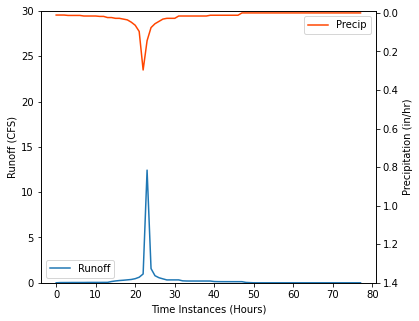

In [155]:
# This is for your Subcatchment 73421
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73421 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7359, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73421.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73421.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73421['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73421['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [156]:
totalrunoff_73421 = (rpt_73421['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73421,'Total Runoff (CF)'] = totalrunoff_73421
pyswmm_results.at[73421,'Total Runoff (CF)']

runoff_perc_reduction_73421 = ((47783.77153846156 - totalrunoff_73421)/47783.77153846156) *100
pyswmm_results.at[73421,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73421
pyswmm_results.at[73421,'Total Runoff Volume % Reduction']

runoff_reduction_73421 = 47783.77153846156 - totalrunoff_73421
pyswmm_results.at[73421,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73421
pyswmm_results.at[73421,'Total Runoff Volume Reduction (CF)']

5561.59153846158

### Peak Flow

In [157]:
peakflow_73421 = rpt_73421['Runoff (CFS)'].max()
pyswmm_results.at[73421,'Peak Flow (CFS)'] = peakflow_73421
pyswmm_results.at[73421,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73421 = ((14.0531 - peakflow_73421)/14.0531)*100
pyswmm_results.at[73421,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73421
pyswmm_results.at[73421,'Peak Flow % Reduction'] 

peak_runoff_reduction_73421 = 14.0531 - peakflow_73421
pyswmm_results.at[73421,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73421
pyswmm_results.at[73421,'Peak Flow Reduction (CFS)'] 

1.6181999999999999

### TN Load Analysis

In [158]:
load_TN_73421 = (rpt_73421['Runoff (CFS)'].mean() * rpt_73421['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73421,'TN Load (grams)'] = load_TN_73421
pyswmm_results.at[73421,'TN Load (grams)']

total_nitrogen_reduction_percentage_73421 = ((1050.6172975524385 - load_TN_73421)/1050.6172975524385)*100
pyswmm_results.at[73421,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73421
pyswmm_results.at[73421,'TN Load % Reduction']

total_nitrogen_reduction_73421 = 1050.6172975524385 - load_TN_73421
pyswmm_results.at[73421,'TN Load Reduction (grams)']=total_nitrogen_reduction_73421
pyswmm_results.at[73421,'TN Load Reduction (grams)']

201.43684530923917

### TP Load Analysis

In [159]:
load_TP_73421 = (rpt_73421['Runoff (CFS)'].mean() * rpt_73421['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73421,'TP Load (grams)'] = load_TP_73421
pyswmm_results.at[73421,'TP Load (grams)']

total_phosphorus_reduction_percentage_73421 = ((262.6543243881096 - load_TP_73421)/262.6543243881096)*100
pyswmm_results.at[73421,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73421
pyswmm_results.at[73421,'TP Load % Reduction']

total_phosphorus_reduction_73421 = 262.6543243881096 - load_TP_73421
pyswmm_results.at[73421,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73421
pyswmm_results.at[73421,'TP Load Reduction (grams)']

50.63511833345382

### Mean Runoff

In [160]:
mean_runoff_73421= rpt_73421['Runoff (CFS)'].mean()
pyswmm_results.at[73421,'Mean Runoff'] = mean_runoff_73421
pyswmm_results.at[73421,'Mean Runoff']

mean_runoff_reduction_percentage_73421= ((0.34476025641025654-mean_runoff_73421)/0.34476025641025654)*100
pyswmm_results.at[73421,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73421
pyswmm_results.at[73421,'Mean Runoff % Reduction']

11.63908029734531

## Subcatchment 73531

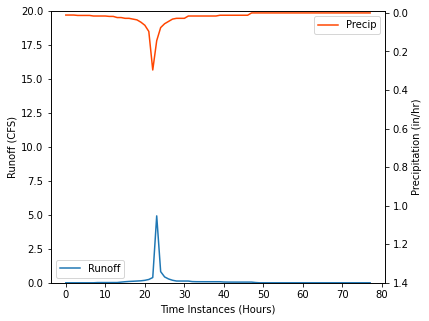

In [161]:
# This is for your Subcatchment 73531
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73531 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7614, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73531.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73531.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73531['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73531['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [162]:
totalrunoff_73531 = (rpt_73531['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73531,'Total Runoff (CF)'] = totalrunoff_73531
pyswmm_results.at[73531,'Total Runoff (CF)']

runoff_perc_reduction_73531 = ((44180.88230769231 - totalrunoff_73531)/44180.88230769231) *100
pyswmm_results.at[73531,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73531
pyswmm_results.at[73531,'Total Runoff Volume % Reduction']

runoff_reduction_73531 = 44180.88230769231 - totalrunoff_73531
pyswmm_results.at[73531,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73531
pyswmm_results.at[73531,'Total Runoff Volume Reduction (CF)']

26866.899230769228

### Peak Flow

In [163]:
peakflow_73531 = rpt_73531['Runoff (CFS)'].max()
pyswmm_results.at[73531,'Peak Flow (CFS)'] = peakflow_73531
pyswmm_results.at[73531,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73531 = ((12.7471 - peakflow_73531)/12.7471)*100
pyswmm_results.at[73531,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73531
pyswmm_results.at[73531,'Peak Flow % Reduction'] 

peak_runoff_reduction_73531 = 12.7471 - peakflow_73531
pyswmm_results.at[73531,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73531
pyswmm_results.at[73531,'Peak Flow Reduction (CFS)'] 

7.8225999999999996

### TN Load Analysis

In [164]:
load_TN_73531 = (rpt_73531['Runoff (CFS)'].mean() * rpt_73531['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73531,'TN Load (grams)'] = load_TN_73531
pyswmm_results.at[73531,'TN Load (grams)']

total_nitrogen_reduction_percentage_73531 = ((925.464509091381 - load_TN_73531)/925.464509091381)*100
pyswmm_results.at[73531,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73531
pyswmm_results.at[73531,'TN Load % Reduction']

total_nitrogen_reduction_73531 = 925.464509091381 - load_TN_73531
pyswmm_results.at[73531,'TN Load Reduction (grams)']=total_nitrogen_reduction_73531
pyswmm_results.at[73531,'TN Load Reduction (grams)']

707.4674206014337

### TP Load Analysis

In [165]:
load_TP_73531 = (rpt_73531['Runoff (CFS)'].mean() * rpt_73531['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73531,'TP Load (grams)'] = load_TP_73531
pyswmm_results.at[73531,'TP Load (grams)']

total_phosphorus_reduction_percentage_73531 = ((239.78673155833837 - load_TP_73531)/239.78673155833837)*100
pyswmm_results.at[73531,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73531
pyswmm_results.at[73531,'TP Load % Reduction']

total_phosphorus_reduction_73531 = 239.78673155833837 - load_TP_73531
pyswmm_results.at[73531,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73531
pyswmm_results.at[73531,'TP Load Reduction (grams)']

183.21006950026742

### Mean Runoff

In [166]:
mean_runoff_73531= rpt_73531['Runoff (CFS)'].mean()
pyswmm_results.at[73531,'Mean Runoff'] = mean_runoff_73531
pyswmm_results.at[73531,'Mean Runoff']

mean_runoff_reduction_percentage_73531= ((0.3187653846153846-mean_runoff_73531)/0.3187653846153846)*100
pyswmm_results.at[73531,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73531
pyswmm_results.at[73531,'Mean Runoff % Reduction']

60.811142348081724

## Subcatchment 73571

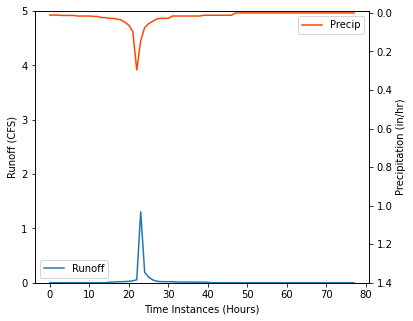

In [167]:
# This is for your Subcatchment 73571
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73571 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7784, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73571.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73571.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73571['Runoff (CFS)']); plt.ylim((-0.001,5)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73571['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

### Total Runoff

In [168]:
totalrunoff_73571 = (rpt_73571['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73571,'Total Runoff (CF)'] = totalrunoff_73571
pyswmm_results.at[73571,'Total Runoff (CF)']

runoff_perc_reduction_73571 = ((22943.275384615383 - totalrunoff_73571)/22943.275384615383) *100
pyswmm_results.at[73571,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73571
pyswmm_results.at[73571,'Total Runoff Volume % Reduction']

runoff_reduction_73571 = 22943.275384615383 - totalrunoff_73571
pyswmm_results.at[73571,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73571
pyswmm_results.at[73571,'Total Runoff Volume Reduction (CF)']

19281.74769230769

### Peak Flow

In [169]:
peakflow_73571 = rpt_73571['Runoff (CFS)'].max()
pyswmm_results.at[73571,'Peak Flow (CFS)'] = peakflow_73571
pyswmm_results.at[73571,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73571 = ((6.0776 - peakflow_73571)/6.0776)*100
pyswmm_results.at[73571,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73571
pyswmm_results.at[73571,'Peak Flow % Reduction'] 

peak_runoff_reduction_73571 = 6.0776 - peakflow_73571
pyswmm_results.at[73571,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73571
pyswmm_results.at[73571,'Peak Flow Reduction (CFS)'] 

4.7739

### TN Load Analysis

In [170]:
load_TN_73571 = (rpt_73531['Runoff (CFS)'].mean() * rpt_73571['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73571,'TN Load (grams)'] = load_TN_73571
pyswmm_results.at[73571,'TN Load (grams)']

total_nitrogen_reduction_percentage_73571 = ((971.1763609269152 - load_TN_73571)/971.1763609269152)*100
pyswmm_results.at[73571,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73571
pyswmm_results.at[73571,'TN Load % Reduction']

total_nitrogen_reduction_73571 = 971.1763609269152 - load_TN_73571
pyswmm_results.at[73571,'TN Load Reduction (grams)']=total_nitrogen_reduction_73571
pyswmm_results.at[73571,'TN Load Reduction (grams)']

832.1892315603932

### TP Load Analysis

In [171]:
load_TP_73571 = (rpt_73571['Runoff (CFS)'].mean() * rpt_73571['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73571,'TP Load (grams)'] = load_TP_73571
pyswmm_results.at[73571,'TP Load (grams)']

total_phosphorus_reduction_percentage_73571 = ((127.4372583114034 - load_TP_73571)/127.4372583114034)*100
pyswmm_results.at[73571,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73571
pyswmm_results.at[73571,'TP Load % Reduction']

total_phosphorus_reduction_73571 = 127.4372583114034 - load_TP_73571
pyswmm_results.at[73571,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73571
pyswmm_results.at[73571,'TP Load Reduction (grams)']

120.01330774740529

### Mean Runoff

In [172]:
mean_runoff_73571= rpt_73571['Runoff (CFS)'].mean()
pyswmm_results.at[73571,'Mean Runoff'] = mean_runoff_73571
pyswmm_results.at[73571,'Mean Runoff']

mean_runoff_reduction_percentage_73571= ((0.16553589743589742-mean_runoff_73571)/0.16553589743589742)*100
pyswmm_results.at[73571,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73571
pyswmm_results.at[73571,'Mean Runoff % Reduction']

84.040954785545

## Subcatchment 73461

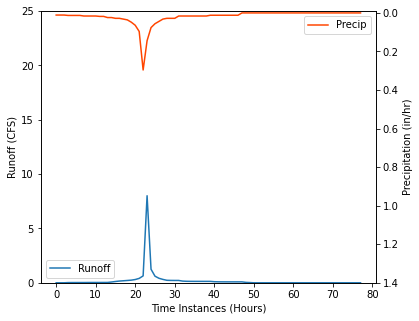

In [173]:
# This is for your Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7444, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)


fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


# Subcatchment 73461 Data Analysis

### Total Runoff

In [174]:
totalrunoff_73461 = (rpt_73461['Runoff (CFS)'].mean())*38.5*3600
pyswmm_results.at[73461,'Total Runoff (CF)'] = totalrunoff_73461
pyswmm_results.at[73461,'Total Runoff (CF)']

runoff_perc_reduction_73461 = ((49318.677692307705 - totalrunoff_73461)/49318.677692307705) *100
pyswmm_results.at[73461,'Total Runoff Volume % Reduction'] = runoff_perc_reduction_73461
pyswmm_results.at[73461,'Total Runoff Volume % Reduction']

runoff_reduction_73461 = 49318.677692307705 - totalrunoff_73461
pyswmm_results.at[73461,'Total Runoff Volume Reduction (CF)'] = runoff_reduction_73461
pyswmm_results.at[73461,'Total Runoff Volume Reduction (CF)']

21060.98076923079

### Peak Flow

In [175]:
peakflow_73461 = rpt_73461['Runoff (CFS)'].max()
pyswmm_results.at[73461,'Peak Flow (CFS)'] = peakflow_73461
pyswmm_results.at[73461,'Peak Flow (CFS)']

peak_runoff_reduction_percentage_73461 = ((13.72 - peakflow_73461)/13.72)*100
pyswmm_results.at[73461,'Peak Flow % Reduction'] = peak_runoff_reduction_percentage_73461
pyswmm_results.at[73461,'Peak Flow % Reduction'] 

peak_runoff_reduction_73461 = 13.72 - peakflow_73461
pyswmm_results.at[73461,'Peak Flow Reduction (CFS)'] = peak_runoff_reduction_73461
pyswmm_results.at[73461,'Peak Flow Reduction (CFS)'] 

5.712300000000001

### TN Load Analysis

In [176]:
load_TN_73461 = (rpt_73461['Runoff (CFS)'].mean() * rpt_73461['Total Nitrogen (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73461,'TN Load (grams)'] = load_TN_73461
pyswmm_results.at[73461,'TN Load (grams)']

total_nitrogen_reduction_percentage_73461 = ((1201.6750941456735 - load_TN_73461)/1201.6750941456735)*100
pyswmm_results.at[73461,'TN Load % Reduction']=total_nitrogen_reduction_percentage_73461
pyswmm_results.at[73461,'TN Load % Reduction']

total_nitrogen_reduction_73461 = 1201.6750941456735 - load_TN_73461
pyswmm_results.at[73461,'TN Load Reduction (grams)']=total_nitrogen_reduction_73461
pyswmm_results.at[73461,'TN Load Reduction (grams)']

731.5561400930113

### TP Load Analysis 

In [177]:
load_TP_73461 = (rpt_73461['Runoff (CFS)'].mean() * rpt_73461['Total Phosphorous (mg/L)'].mean() * 28.3168 * 38.5*3600) /1000
pyswmm_results.at[73461,'TP Load (grams)'] = load_TP_73461
pyswmm_results.at[73461,'TP Load (grams)']

total_phosphorus_reduction_percentage_73461 = ((310.4631702200066 - load_TP_73461)/310.4631702200066)*100
pyswmm_results.at[73461,'TP Load % Reduction'] = total_phosphorus_reduction_percentage_73461
pyswmm_results.at[73461,'TP Load % Reduction']

total_phosphorus_reduction_73461 = 310.4631702200066 - load_TP_73461
pyswmm_results.at[73461,'TP Load Reduction (grams)'] = total_phosphorus_reduction_73461
pyswmm_results.at[73461,'TP Load Reduction (grams)']

189.13520047333253

### Mean Runoff

In [178]:
mean_runoff_73461= rpt_73461['Runoff (CFS)'].mean()
pyswmm_results.at[73461,'Mean Runoff'] = mean_runoff_73461
pyswmm_results.at[73461,'Mean Runoff']

mean_runoff_reduction_percentage_73461= ((0.35583461538461547-mean_runoff_73461)/0.35583461538461547)*100
pyswmm_results.at[73461,'Mean Runoff % Reduction']= mean_runoff_reduction_percentage_73461
pyswmm_results.at[73461,'Mean Runoff % Reduction']

42.70386343410764

In [179]:
pyswmm_results['Total_LID_Costs ($)'] = ""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'Total_LID_Costs ($)'] = (subbasin_attributes.at[subbasin,'GreenRoof_Costs']+
                                                         subbasin_attributes.at[subbasin,'PermeablePavement_Costs']+
                                                         subbasin_attributes.at[subbasin,'RainGarden_Costs']+
                                                         subbasin_attributes.at[subbasin,'Bioretention_Costs']+
                                                         subbasin_attributes.at[subbasin,'GrassSwale_Costs'])

In [180]:
pyswmm_results['Runoff/Area']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'Runoff/Area'] = pyswmm_results.at[subbasin,'Total Runoff (CF)']/pyswmm_results.at[subbasin,'Areas']

In [181]:
pyswmm_results['% of Total Volume'] =""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'% of Total Volume']= (pyswmm_results.at[subbasin,'Total Runoff (CF)']*100/pyswmm_results['Total Runoff (CF)'].sum())

In [182]:
pyswmm_results['TN/Area']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'TN/Area']=pyswmm_results.at[subbasin,'TN Load (grams)']/pyswmm_results.at[subbasin,'Areas']

In [183]:
pyswmm_results['% of Total TN']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'% of Total TN']=pyswmm_results.at[subbasin,'TN Load (grams)']*100/pyswmm_results['TN Load (grams)'].sum()

In [184]:
pyswmm_results['TP/Area']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'TP/Area']=pyswmm_results.at[subbasin,'TP Load (grams)']/pyswmm_results.at[subbasin,'Areas']

In [185]:
pyswmm_results['% of Total TP']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'% of Total TP']=pyswmm_results.at[subbasin,'TP Load (grams)']*100/pyswmm_results['TP Load (grams)'].sum()

In [186]:
pyswmm_results['Mean Runoff/Area']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'Mean Runoff/Area']=pyswmm_results.at[subbasin, 'Mean Runoff']/ pyswmm_results.at[subbasin,'Areas']

In [187]:
pyswmm_results['% of Total Mean Runoff']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'% of Total Mean Runoff']=pyswmm_results.at[subbasin,'Mean Runoff']*100/pyswmm_results['Mean Runoff'].sum()

In [188]:
pyswmm_results['% of Peak Runoff']=""

for subbasin in pyswmm_results.index:
    pyswmm_results.at[subbasin,'% of Peak Runoff'] = pyswmm_results.at[subbasin,'Peak Flow (CFS)']*100/pyswmm_results['Peak Flow (CFS)'].sum()

### Subcatchment Costs

# Outflow near MC7 (In stream, near outlet of SWMM Model)


### No LID Scenario for Comparison


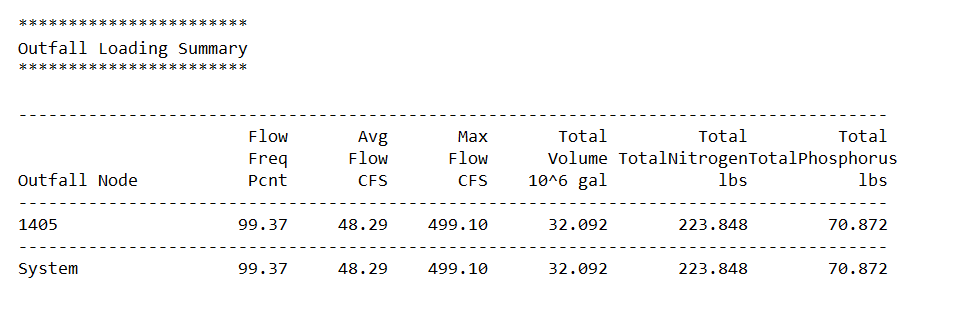

In [189]:
from IPython.display import Image
Image(filename=r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\BaseScenarioOutfallData.PNG") 

In [190]:
# Outfall
reportColumns = [str(i) for i in np.arange(0,15)]
rpt_1405 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 37646, nrows = 1, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_1405.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_1405.rename(columns = {'0':'Outfall Node','6':'Flow Freq %','7':'Avg Flow (CFS)','8':'Max Flow (CFS)','10':'Total Volume (10^6 Gallons)','12':'Total Nitrogen Load (lbs)','14':'Total Phosphorous Load (lbs)'},inplace = True)

In [191]:
rpt_1405.head()

,Outfall Node,Flow Freq %,...,Total Nitrogen Load (lbs),Total Phosphorous Load (lbs)
0,1405,99.37,...,205.492,65.693


In [192]:
rpt_1405.at[0,'Max Flow (CFS)']

463.49

## Total_Costs

In [193]:
outfall_results.at[1405,'Total Costs ($)'] = pyswmm_results['Total_LID_Costs ($)'].sum()

outfall_results.at[1405,'Total Costs ($)']

11467264

## Total Reduction Calculations

In [194]:
outfall_results.at[1405,'Total Volume (10^6 Gallons)'] = rpt_1405.at[0,'Total Volume (10^6 Gallons)']

volume_reduction = 32.092 - rpt_1405.at[0,'Total Volume (10^6 Gallons)']

for o in outfall_results.index:
    outfall_results.at[o,'Volume Reduction (10^6 Gallons)'] = volume_reduction
outfall_results.at[o,'Volume Reduction (10^6 Gallons)']


volume_reduction_percentage = ((32.092- rpt_1405.at[0,'Total Volume (10^6 Gallons)'])/32.092)*100

for o in outfall_results.index:
    outfall_results.at[o,'Volume Reduction %'] = volume_reduction_percentage
outfall_results.at[1405,'Volume Reduction %']

5

In [195]:
outfall_results.at[1405,'Max Flow (CFS)'] = rpt_1405.at[0,'Max Flow (CFS)']

peakflow_reduction = 499.1 - rpt_1405.at[0,'Max Flow (CFS)']

for o in outfall_results.index:
    outfall_results.at[o,'Peak Flow Reduction (CFS)'] = peakflow_reduction
    
peakflow_reduction_percentage = ((499.1 - rpt_1405.at[0,'Max Flow (CFS)'])/499.1)*100

for subbasin in outfall_results.index:
    outfall_results.at[o,'Peak Flow Reduction %'] = peakflow_reduction_percentage

outfall_results.at[1405,'Peak Flow Reduction %']

7

In [196]:
outfall_results.at[1405,'Total Nitrogen Load (lbs)']= rpt_1405.at[0,'Total Nitrogen Load (lbs)']

TN_reduction = 223.84799999999998 - rpt_1405.at[0,'Total Nitrogen Load (lbs)']

for o in outfall_results.index:
    outfall_results.at[o,'TN Load Reduction (lbs)'] = TN_reduction
    
TN_reduction_percentage = ((223.84799999999998- rpt_1405.at[0,'Total Nitrogen Load (lbs)'])/223.84799999999998)*100

for o in outfall_results.index:
    outfall_results.at[o,'TN Load Reduction %'] = TN_reduction_percentage

outfall_results.at[1405,'TN Load Reduction %']  

8

In [197]:
outfall_results.at[1405,'Total Phosphorous Loads (lbs)'] = rpt_1405.at[0,'Total Phosphorous Load (lbs)']

TP_reduction = 70.872 - rpt_1405.at[0,'Total Phosphorous Load (lbs)']

for o in outfall_results.index:
    outfall_results.at[o,'TP Load Reduction (lbs)'] = TP_reduction
    
TP_reduction_percentage = ((70.872 - rpt_1405.at[0,'Total Phosphorous Load (lbs)'])/70.872)*100

for o in outfall_results.index:
    outfall_results.at[1405,'TP Load Reduction %'] = TP_reduction_percentage



## Output Files

In [198]:
subbasin_attributes.to_csv(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\FinalDF.csv", index=True)

In [200]:
pyswmm_results.to_csv(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\Target_Subbasin_Analysis.csv", index=True)

In [201]:
outfall_results.to_csv(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\PYTHON CSV files for MC\pyswmm_Outfall_Results.csv", index=True)